In [1]:
import pandas as pd
df_cpp_ident_problems = pd.read_csv(r"C:\Users\sebas\Documents\Masterarbeit\datasets\2_parallel_dataset\cpp14_w_ident_problems.csv", index_col=0)
df_java_ident_problems = pd.read_csv(r"C:\Users\sebas\Documents\Masterarbeit\datasets\2_parallel_dataset\java8_w_ident_problems.csv", index_col=0)
df_python_ident_problems = pd.read_csv(r"C:\Users\sebas\Documents\Masterarbeit\datasets\2_parallel_dataset\python3_w_ident_problems.csv", index_col=0)

C:\Users\sebas\AppData\Local\Temp\ipykernel_23420\773074560.py:2: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  df_cpp_ident_problems = pd.read_csv(r"C:\Users\sebas\Documents\Masterarbeit\datasets\2_parallel_dataset\cpp14_w_ident_problems.csv", index_col=0)


In [3]:
cpp_submissions_count = df_cpp_ident_problems.groupby(["problem_id"]).size().reset_index(name="count").sort_values("count", ascending=False).query(f"count >= {1}")
cpp_submissions_count

,problem_id,count
2753,p03160,11846
2754,p03161,11527
2755,p03162,10816
2756,p03163,10777
2758,p03165,6938
...,...,...
1112,p01192,1
636,p00641,1
638,p00644,1
639,p00645,1


In [4]:
python_submissions_count = df_python_ident_problems.groupby(["problem_id"]).size().reset_index(name="count").sort_values("count", ascending=False).query(f"count >= {1}")
python_submissions_count

,problem_id,count
134,p02677,3673
145,p02688,3315
115,p02658,3305
517,p03086,3131
103,p02641,3108
...,...,...
325,p02876,1
324,p02875,1
1205,p03887,1
1204,p03886,1


In [5]:
java_submissions_count = df_java_ident_problems.groupby(["problem_id"]).size().reset_index(name="count").sort_values("count", ascending=False).query(f"count >= {1}")
java_submissions_count

,problem_id,count
554,p03160,721
555,p03161,674
557,p03163,655
556,p03162,624
159,p02724,535
...,...,...
1316,p03982,1
963,p03595,1
1117,p03756,1
1230,p03874,1


In [6]:
merged_cpp_python = cpp_submissions_count.merge(python_submissions_count, on="problem_id")

In [7]:
merged_cpp_python

,problem_id,count_x,count_y
0,p03160,11846,1951
1,p03161,11527,452
2,p03162,10816,1316
3,p03163,10777,288
4,p03165,6938,36
...,...,...,...
1196,p02674,1,1
1197,p02673,1,1
1198,p02669,1,174
1199,p02670,1,17


In [8]:
merged_cpp_python_java = merged_cpp_python.merge(java_submissions_count, on="problem_id")
merged_cpp_python_java

,problem_id,count_x,count_y,count
0,p03160,11846,1951,721
1,p03161,11527,452,674
2,p03162,10816,1316,624
3,p03163,10777,288,655
4,p03165,6938,36,373
...,...,...,...,...
1171,p02682,2,2419,108
1172,p02673,1,1,2
1173,p02669,1,174,6
1174,p02670,1,17,4


In [11]:
samples_per_problem = 300
merged_cpp_python_java.query(f"count_x >= {samples_per_problem} and count_y >= {samples_per_problem} and count >= {samples_per_problem}")

,problem_id,count_x,count_y,count
0,p03160,11846,1951,721
1,p03161,11527,452,674
2,p03162,10816,1316,624
6,p02724,6740,2748,535
7,p02725,6614,2565,481
...,...,...,...,...
245,p03814,2858,1510,309
250,p03059,2825,1374,323
341,p03242,2407,1562,314
344,p03315,2403,1123,306


In [35]:
ident_problems_path = r"C:\Users\sebas\Documents\Masterarbeit\Project_CodeNet\derived\duplicates\identical_problem_clusters"
duplicate_problem_ids = []
with open(ident_problems_path, 'r', encoding='utf-8') as file:
    while (line := file.readline().rstrip()):
        cluster = line.split(',')
        cluster_rows = merged_cpp_python_java.query(f"problem_id in {cluster}")
        if not cluster_rows.empty:
                random_cluster = cluster_rows.sample(1)
                random_cluster_problem_id = random_cluster.iloc[0]['problem_id']
                cluster.remove(random_cluster_problem_id)
                duplicate_problem_ids.extend(cluster)
        else:
            duplicate_problem_ids.extend(cluster)

In [36]:
len(duplicate_problem_ids)

182

In [37]:
df_cpp = df_cpp_ident_problems.query(f"problem_id not in {duplicate_problem_ids}")
df_java = df_java_ident_problems.query(f"problem_id not in {duplicate_problem_ids}")
df_python = df_python_ident_problems.query(f"problem_id not in {duplicate_problem_ids}")

In [38]:
df_cpp.groupby(["problem_id"]).size().reset_index(name="count").sort_values("count", ascending=False)

,problem_id,count
2726,p03160,11846
2727,p03161,11527
2728,p03162,10816
2730,p03165,6938
2729,p03164,6841
...,...,...
1349,p01509,1
1150,p01264,1
1729,p01952,1
1730,p01953,1


In [42]:
df_cpp.to_csv(r"C:\Users\sebas\Documents\Masterarbeit\datasets\2_parallel_dataset\cpp14.csv")
df_java.to_csv(r"C:\Users\sebas\Documents\Masterarbeit\datasets\2_parallel_dataset\java8.csv")
df_python.to_csv(r"C:\Users\sebas\Documents\Masterarbeit\datasets\2_parallel_dataset\python3.csv")

In [43]:
cpp_submissions_count = df_cpp.groupby(["problem_id"]).size().reset_index(name="count").sort_values("count", ascending=False).query(f"count >= {1}")
python_submissions_count = df_python.groupby(["problem_id"]).size().reset_index(name="count").sort_values("count", ascending=False).query(f"count >= {1}")
java_submissions_count = df_java.groupby(["problem_id"]).size().reset_index(name="count").sort_values("count", ascending=False).query(f"count >= {1}")

In [44]:
merged_cpp_python = cpp_submissions_count.merge(python_submissions_count, on="problem_id")
merged_cpp_python_java = merged_cpp_python.merge(java_submissions_count, on="problem_id")

In [52]:
samples_per_problem = 326
parallel_dataset = merged_cpp_python_java.query(f"count_x >= {samples_per_problem} and count_y >= {samples_per_problem} and count >= {samples_per_problem}")

In [53]:
problem_ids = parallel_dataset['problem_id'].unique()

In [54]:
len(problem_ids)

104

In [55]:
from dataset.CodeNet import CodeNet
code_net = CodeNet(location=r"C:\Users\sebas\Documents\Masterarbeit\Project_CodeNet")

In [56]:
submission_metadata = code_net.get_submission_metadata()
submission_metadata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13916868 entries, 0 to 1088
Data columns (total 12 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   submission_id      string
 1   problem_id         string
 2   user_id            string
 3   date               Int64 
 4   language           string
 5   original_language  string
 6   filename_ext       string
 7   status             string
 8   cpu_time           Int64 
 9   memory             Int64 
 10  code_size          Int64 
 11  accuracy           string
dtypes: Int64(4), string(8)
memory usage: 1.4 GB


In [57]:
import os
import shutil
target_dir = r"C:\Users\sebas\Documents\Masterarbeit\datasets\2_parallel_dataset\data"
for problem_id in problem_ids:
    cpp14_samples = df_cpp.query(f'problem_id == "{problem_id}"').sample(samples_per_problem)
    python3_samples = df_python.query(f'problem_id == "{problem_id}"').sample(samples_per_problem)
    java8_samples = df_java.query(f'problem_id == "{problem_id}"').sample(samples_per_problem)

    problem_id_trg_dir = os.path.join(target_dir, problem_id)
    os.mkdir(problem_id_trg_dir)

    problem_id_cpp14_trg_dir = os.path.join(problem_id_trg_dir, 'cpp14')
    os.mkdir(problem_id_cpp14_trg_dir)
    submission_ids = cpp14_samples["submission_id"].values
    paths = code_net.get_src_paths_of_submissions(list(submission_ids))
    for _, value in paths.items():
        shutil.copy(value, problem_id_cpp14_trg_dir)

    problem_id_python3_trg_dir = os.path.join(problem_id_trg_dir, 'python3')
    os.mkdir(problem_id_python3_trg_dir)
    submission_ids = python3_samples["submission_id"].values
    paths = code_net.get_src_paths_of_submissions(list(submission_ids))
    for _, value in paths.items():
        shutil.copy(value, problem_id_python3_trg_dir)

    problem_id_java8_trg_dir = os.path.join(problem_id_trg_dir, 'java8')
    os.mkdir(problem_id_java8_trg_dir)
    submission_ids = java8_samples["submission_id"].values
    paths = code_net.get_src_paths_of_submissions(list(submission_ids))
    for _, value in paths.items():
        shutil.copy(value, problem_id_java8_trg_dir)

In [60]:
import os
import re
path = r"C:\Users\sebas\Documents\Masterarbeit\datasets\2_parallel_dataset\data"

fname = []
for root,d_names,f_names in os.walk(path):
    for f in f_names:
        if ".py" not in f:
            continue
        fname.append(os.path.join(root, f))
with open(os.path.join(path, "ai4code_py_input.txt"), "w") as f:
    for fn in fname:
       problem_id = re.findall(r"p\d{5}", fn)[0]
       f.write(fn + " " + path + f"\\ai4code_py\\{problem_id}\\\n")

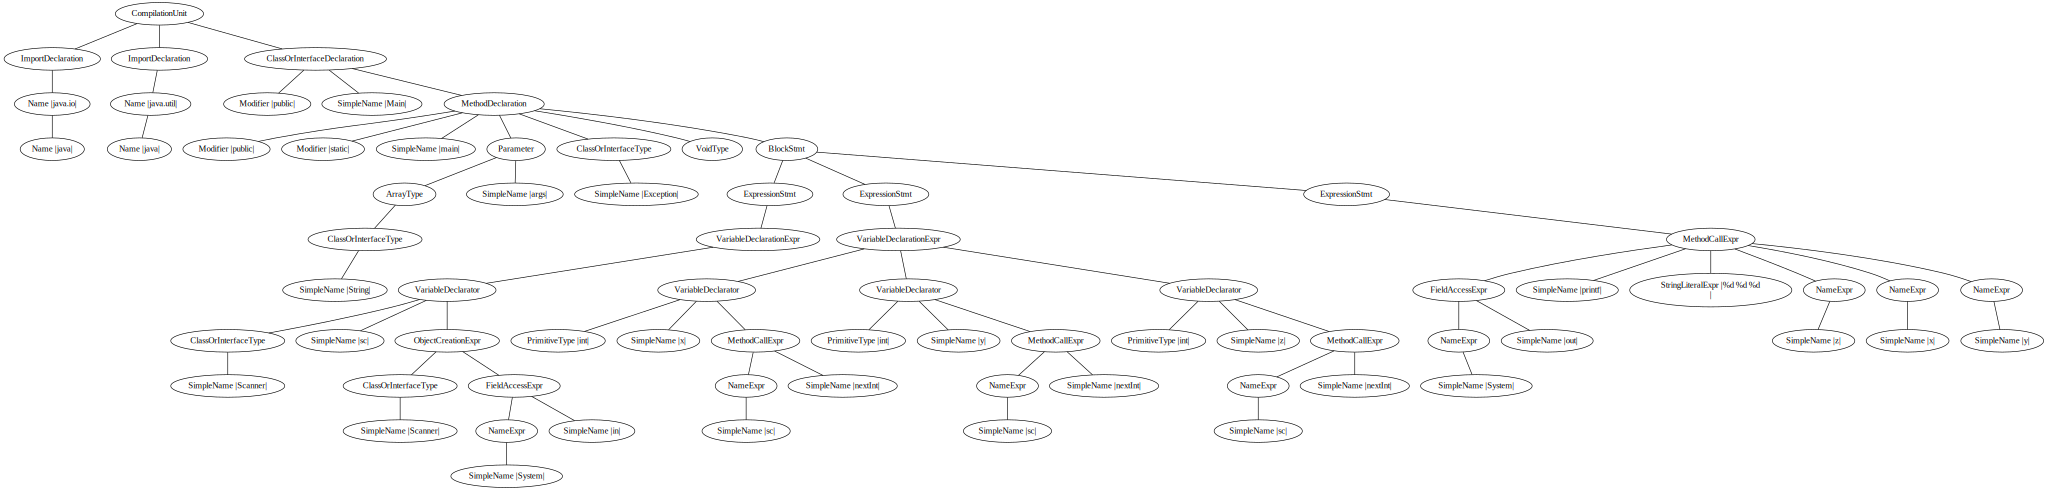

In [62]:
from visualization import AI4CodeGraphVizualizer
from AI4Code.AI4CodeJsonObject import AI4CodeJsonObject
import json
json_file = r"C:\Users\sebas\Documents\Masterarbeit\datasets\2_parallel_dataset\ai4code_java\p02717\s957384792.json"
with open(json_file, 'r') as json_file:
    ai4code_json = json.load(json_file)

ai4code = AI4CodeJsonObject.from_json(ai4code_json)
ast = ai4code.get_graph().get_root_node()
AI4CodeGraphVizualizer.visualize_ast(ast)

In [1]:
from dataset.AI4CodeProblemClassificationDataset import AI4CodeProblemClassificationDataset

dataset = AI4CodeProblemClassificationDataset(r"C:\Users\sebas\Documents\Masterarbeit\datasets\2_parallel_dataset\ai4code_problem_class_java", r"C:\Users\sebas\Documents\Masterarbeit\datasets\2_parallel_dataset\ai4code_java", 220, 53, 53)

In [64]:
dataset.create()

processing p02717 ...
... finished p02717
processing p02718 ...
... finished p02718
processing p02719 ...
... finished p02719
processing p02723 ...
... finished p02723
processing p02724 ...
... finished p02724
processing p02725 ...
... finished p02725
processing p02729 ...
... finished p02729
processing p02730 ...
... finished p02730
processing p02731 ...
... finished p02731
processing p02753 ...
... finished p02753
processing p02754 ...
... finished p02754
processing p02755 ...
... finished p02755
processing p02760 ...
... finished p02760
processing p02766 ...
... finished p02766
processing p02767 ...
... finished p02767
processing p02771 ...
... finished p02771
processing p02772 ...
... finished p02772
processing p02773 ...
... finished p02773
processing p02779 ...
... finished p02779
processing p02783 ...
... finished p02783
processing p02784 ...
... finished p02784
processing p02785 ...
... finished p02785
processing p02786 ...
... finished p02786
processing p02790 ...
... finished

In [2]:
dataset.get_vocabulary_map()

{'!': 1,
 '!=': 2,
 '%': 3,
 '%=': 4,
 '&': 5,
 '&&': 6,
 '&=': 7,
 '*': 8,
 '*=': 9,
 '+': 10,
 '++': 11,
 '+=': 12,
 '-': 13,
 '--': 14,
 '-=': 15,
 '/': 16,
 '/=': 17,
 '<': 18,
 '<<': 19,
 '<<=': 20,
 '<=': 21,
 '=': 22,
 '==': 23,
 '>': 24,
 '>=': 25,
 '>>': 26,
 '>>=': 27,
 '>>>': 28,
 '>>>=': 29,
 'AnnotationDeclaration': 30,
 'AnnotationMemberDeclaration': 31,
 'ArrayAccessExpr': 32,
 'ArrayCreationExpr': 33,
 'ArrayCreationLevel': 34,
 'ArrayInitializerExpr': 35,
 'ArrayType': 36,
 'AssertStmt': 37,
 'AssignExpr': 38,
 'BinaryExpr': 39,
 'BlockStmt': 40,
 'BooleanLiteralExpr': 41,
 'BreakStmt': 42,
 'CastExpr': 43,
 'CatchClause': 44,
 'CharLiteralExpr': 45,
 'ClassExpr': 46,
 'ClassOrInterfaceDeclaration': 47,
 'ClassOrInterfaceType': 48,
 'CompilationUnit': 49,
 'ConditionalExpr': 50,
 'ConstructorDeclaration': 51,
 'ContinueStmt': 52,
 'DoStmt': 53,
 'DoubleLiteralExpr': 54,
 'EmptyStmt': 55,
 'EnclosedExpr': 56,
 'EnumConstantDeclaration': 57,
 'EnumDeclaration': 58,
 'Exp

In [3]:
from keras.metrics import Precision, Recall
import tensorflow as tf
from classifier.Tbcnn import Tbcnn
node_map = dataset.get_vocabulary_map()
labels = dataset.get_labels()
model = Tbcnn(feature_size=len(node_map), num_kernels=600, num_classes=len(labels))
model.compile(loss=tf.keras.losses.CategoricalCrossentropy(), optimizer='adam',
              metrics = [tf.keras.metrics.CategoricalAccuracy(), Precision(), Recall()])

In [4]:
from generators.FileStreamDataGenerator import FileStreamDataGenerator

train_files = dataset.get_train_files()
val_files = dataset.get_val_files()
training_generator = FileStreamDataGenerator(train_files, labels, node_map, batch_size=1, shuffle=True)
validation_generator = FileStreamDataGenerator(val_files, labels, node_map, batch_size=1, shuffle=False)
model.fit(training_generator, validation_data=validation_generator, epochs=1)

22880/22880 [==============================] - 238s 10ms/step - loss: 1.2937 - categorical_accuracy: 0.7029 - precision: 0.9085 - recall: 0.5870 - val_loss: 0.6055 - val_categorical_accuracy: 0.8530 - val_precision: 0.9204 - val_recall: 0.7992


In [5]:
test_files = dataset.get_test_files()
test_generator = FileStreamDataGenerator(test_files, labels, node_map, batch_size=1, shuffle=False)
y_hat = model.predict(test_generator)
metrics = model.evaluate(test_generator)

5512/5512 [==============================] - 40s 7ms/step - loss: 0.6109 - categorical_accuracy: 0.8507 - precision: 0.9188 - recall: 0.7963


In [6]:
from numpy import argmax
labels = list(test_generator.get_label_lookup().keys())
expected_labels = []
predicted_labels = []
for i in range(len(test_generator)):
    _, y = test_generator[i]
    expected_label = labels[argmax(y)]
    predicted_label = labels[argmax(y_hat[i])]
    expected_labels.append(expected_label)
    predicted_labels.append(predicted_label)

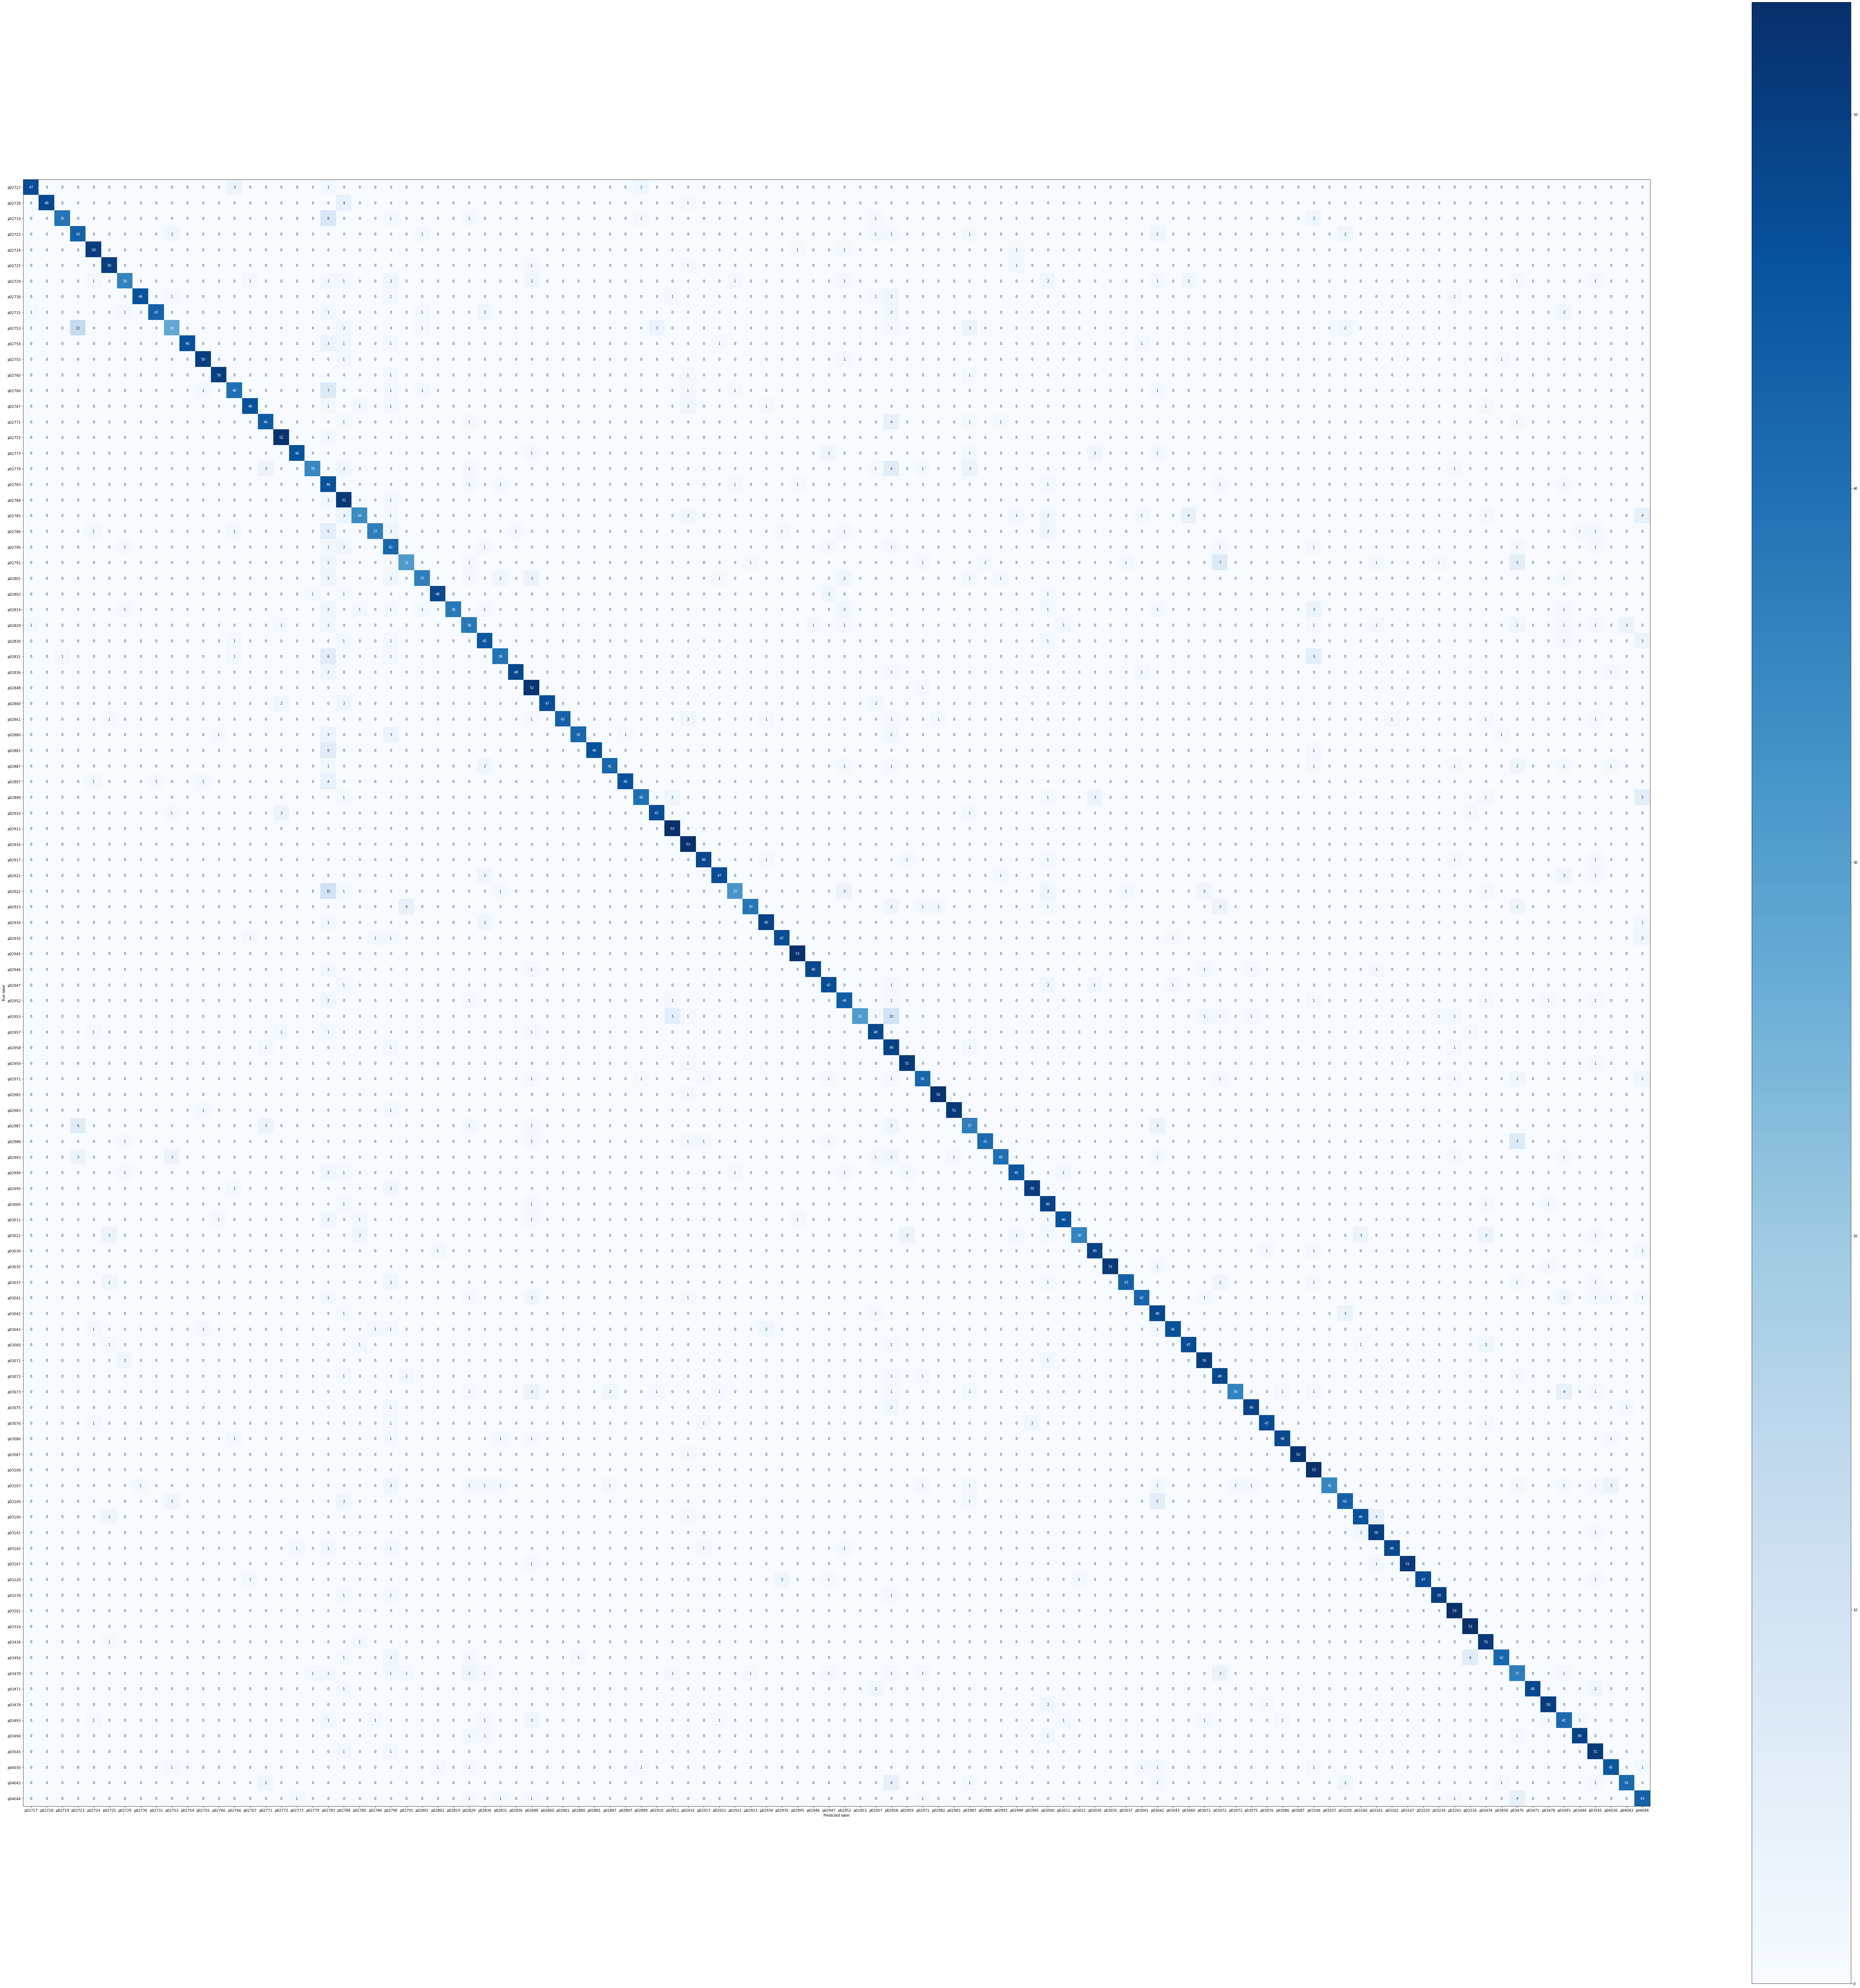

In [7]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from matplotlib import pyplot as plt
_, ax = plt.subplots(1, 1, figsize=(104, 104))
cm = confusion_matrix(expected_labels, predicted_labels, labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap=plt.cm.Blues, ax=ax)
plt.show()

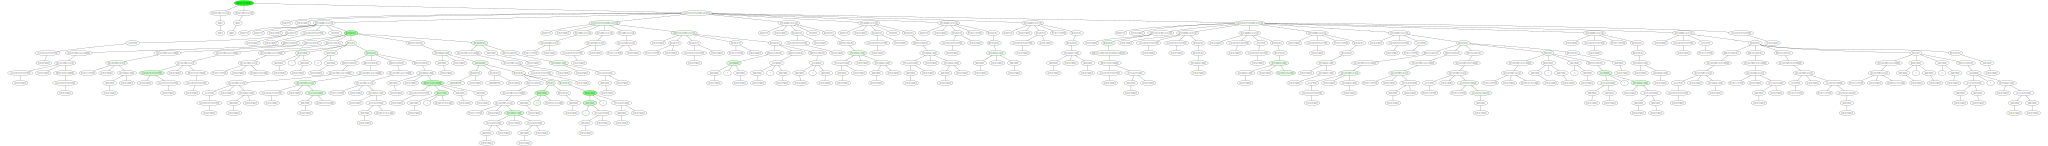

In [8]:
from collections import Counter
from visualization.GraphvizVisualizer import GraphvizVisualizer
sample_id = 1
nodes, children = test_generator.__getitem__(sample_id)[0]
conv_filter_activations = model.conv_layer([nodes, children])
node_importance = model.pooling_layer(conv_filter_activations)[0]
node_importance_list = node_importance.numpy().tolist()[0]
counter = Counter(node_importance_list)
import pickle
with open(test_files[sample_id], 'rb') as f:
    test_sample_ast = pickle.load(f)
vis = GraphvizVisualizer()
vis.visualizeAst(test_sample_ast, counter)

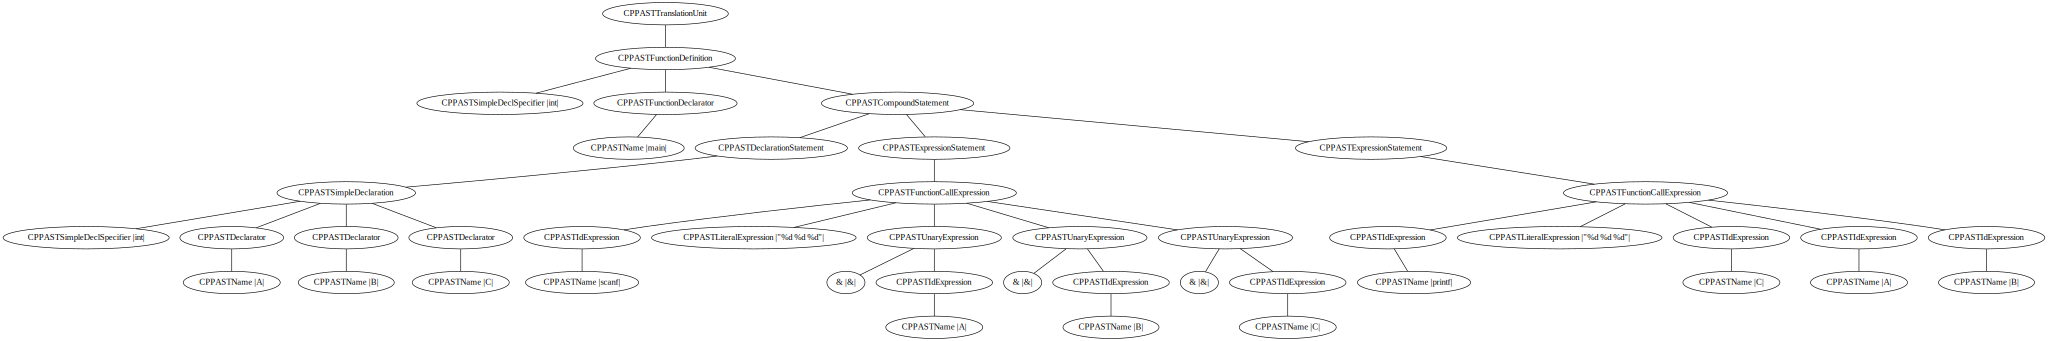

In [11]:
from visualization import AI4CodeGraphVizualizer
from AI4Code.AI4CodeJsonObject import AI4CodeJsonObject
import json
json_file = r"C:\Users\sebas\Documents\Masterarbeit\datasets\2_parallel_dataset\ai4code_cpp\p02717\s914764764.json"
with open(json_file, 'r') as json_file:
    ai4code_json = json.load(json_file)

ai4code = AI4CodeJsonObject.from_json(ai4code_json)
ast = ai4code.get_graph().get_root_node()
AI4CodeGraphVizualizer.visualize_ast(ast)

In [12]:
from dataset.AI4CodeProblemClassificationDataset import AI4CodeProblemClassificationDataset

dataset = AI4CodeProblemClassificationDataset(r"C:\Users\sebas\Documents\Masterarbeit\datasets\2_parallel_dataset\ai4code_problem_class_cpp", r"C:\Users\sebas\Documents\Masterarbeit\datasets\2_parallel_dataset\ai4code_cpp", 220, 53, 53)

In [13]:
dataset.create()

processing p02717 ...
... finished p02717
processing p02718 ...
... finished p02718
processing p02719 ...
... finished p02719
processing p02723 ...
... finished p02723
processing p02724 ...
... finished p02724
processing p02725 ...
... finished p02725
processing p02729 ...
... finished p02729
processing p02730 ...
... finished p02730
processing p02731 ...
... finished p02731
processing p02753 ...
... finished p02753
processing p02754 ...
... finished p02754
processing p02755 ...
... finished p02755
processing p02760 ...
... finished p02760
processing p02766 ...
... finished p02766
processing p02767 ...
... finished p02767
processing p02771 ...
... finished p02771
processing p02772 ...
... finished p02772
processing p02773 ...
... finished p02773
processing p02779 ...
... finished p02779
processing p02783 ...
... finished p02783
processing p02784 ...
... finished p02784
processing p02785 ...
... finished p02785
processing p02786 ...
... finished p02786
processing p02790 ...
... finished

In [14]:
dataset.get_vocabulary_map()

{'!': 1,
 '!=': 2,
 '%': 3,
 '%=': 4,
 '&': 5,
 '&&': 6,
 '&=': 7,
 '*': 8,
 '*=': 9,
 '+': 10,
 '++': 11,
 '+=': 12,
 '-': 13,
 '--': 14,
 '-=': 15,
 '/': 16,
 '/=': 17,
 '<': 18,
 '<<': 19,
 '<<=': 20,
 '<=': 21,
 '=': 22,
 '==': 23,
 '>': 24,
 '>=': 25,
 '>>': 26,
 '>>=': 27,
 'CPPASTAliasDeclaration': 28,
 'CPPASTArrayDeclarator': 29,
 'CPPASTArrayModifier': 30,
 'CPPASTArraySubscriptExpression': 31,
 'CPPASTBaseSpecifier': 32,
 'CPPASTBinaryExpression': 33,
 'CPPASTBreakStatement': 34,
 'CPPASTCapture': 35,
 'CPPASTCaseStatement': 36,
 'CPPASTCastExpression': 37,
 'CPPASTCatchHandler': 38,
 'CPPASTCompositeTypeSpecifier': 39,
 'CPPASTCompoundStatement': 40,
 'CPPASTConditionalExpression': 41,
 'CPPASTConstructorChainInitializer': 42,
 'CPPASTConstructorInitializer': 43,
 'CPPASTContinueStatement': 44,
 'CPPASTConversionName': 45,
 'CPPASTDeclarationStatement': 46,
 'CPPASTDeclarator': 47,
 'CPPASTDefaultStatement': 48,
 'CPPASTDeleteExpression': 49,
 'CPPASTDoStatement': 50,
 'CPP

In [15]:
from keras.metrics import Precision, Recall
import tensorflow as tf
from classifier.Tbcnn import Tbcnn
node_map = dataset.get_vocabulary_map()
labels = dataset.get_labels()
model = Tbcnn(feature_size=len(node_map), num_kernels=600, num_classes=len(labels))
model.compile(loss=tf.keras.losses.CategoricalCrossentropy(), optimizer='adam',
              metrics = [tf.keras.metrics.CategoricalAccuracy(), Precision(), Recall()])

In [16]:
from generators.FileStreamDataGenerator import FileStreamDataGenerator

train_files = dataset.get_train_files()
val_files = dataset.get_val_files()
training_generator = FileStreamDataGenerator(train_files, labels, node_map, batch_size=1, shuffle=True)
validation_generator = FileStreamDataGenerator(val_files, labels, node_map, batch_size=1, shuffle=False)
model.fit(training_generator, validation_data=validation_generator, epochs=1)

22880/22880 [==============================] - 226s 10ms/step - loss: 1.2126 - categorical_accuracy: 0.7195 - precision_1: 0.9165 - recall_1: 0.6084 - val_loss: 0.5132 - val_categorical_accuracy: 0.8690 - val_precision_1: 0.9266 - val_recall_1: 0.8220


In [17]:
test_files = dataset.get_test_files()
test_generator = FileStreamDataGenerator(test_files, labels, node_map, batch_size=1, shuffle=False)
y_hat = model.predict(test_generator)
metrics = model.evaluate(test_generator)

5512/5512 [==============================] - 37s 7ms/step - loss: 0.5106 - categorical_accuracy: 0.8667 - precision_1: 0.9252 - recall_1: 0.8276


In [18]:
from numpy import argmax
labels = list(test_generator.get_label_lookup().keys())
expected_labels = []
predicted_labels = []
for i in range(len(test_generator)):
    _, y = test_generator[i]
    expected_label = labels[argmax(y)]
    predicted_label = labels[argmax(y_hat[i])]
    expected_labels.append(expected_label)
    predicted_labels.append(predicted_label)

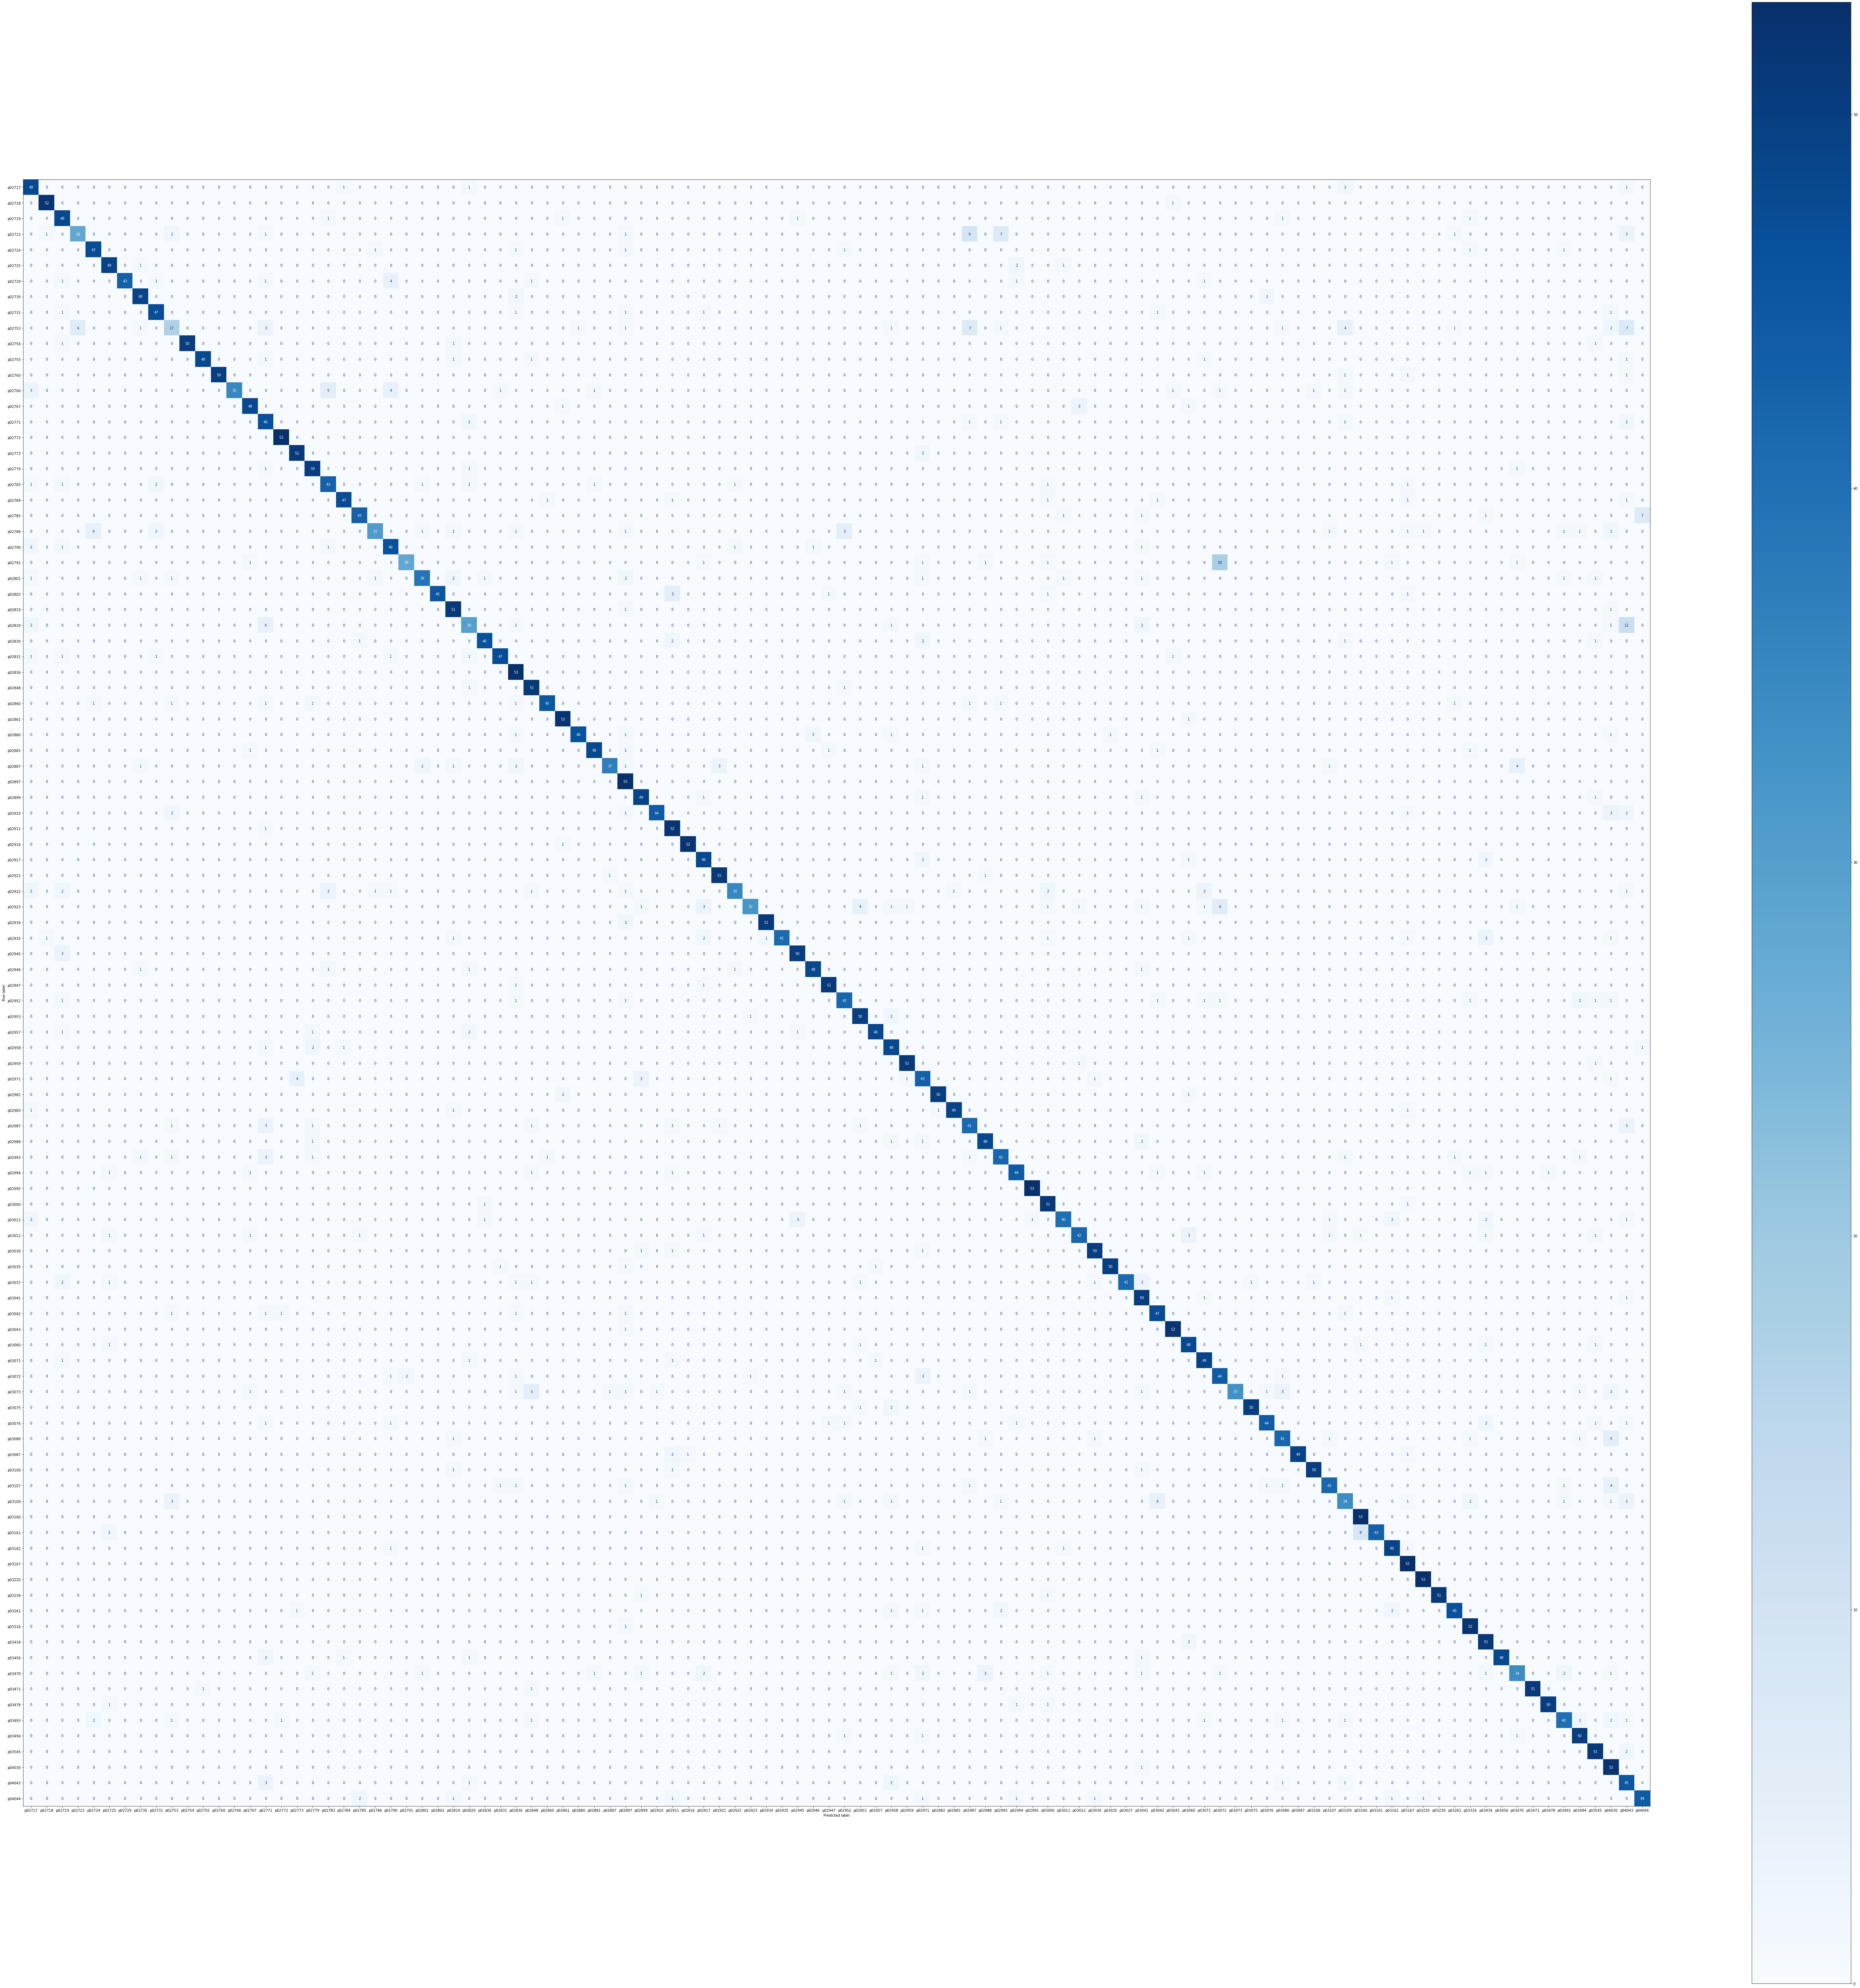

In [19]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from matplotlib import pyplot as plt
_, ax = plt.subplots(1, 1, figsize=(104, 104))
cm = confusion_matrix(expected_labels, predicted_labels, labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap=plt.cm.Blues, ax=ax)
plt.show()

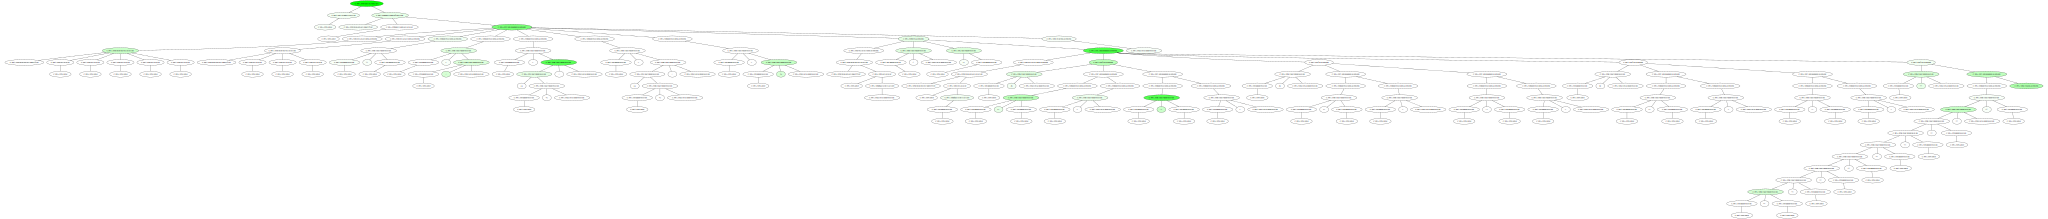

In [26]:
from collections import Counter
from visualization.GraphvizVisualizer import GraphvizVisualizer
sample_id = 1
nodes, children = test_generator.__getitem__(sample_id)[0]
conv_filter_activations = model.conv_layer([nodes, children])
node_importance = model.pooling_layer(conv_filter_activations)[0]
node_importance_list = node_importance.numpy().tolist()[0]
counter = Counter(node_importance_list)
import pickle
with open(test_files[sample_id], 'rb') as f:
    test_sample_ast = pickle.load(f)
vis = GraphvizVisualizer()
vis.visualizeAst(test_sample_ast, counter)

In [27]:
test_files[sample_id]

'C:\\Users\\sebas\\Documents\\Masterarbeit\\datasets\\2_parallel_dataset\\ai4code_problem_class_cpp\\test\\s000679306.pkl'

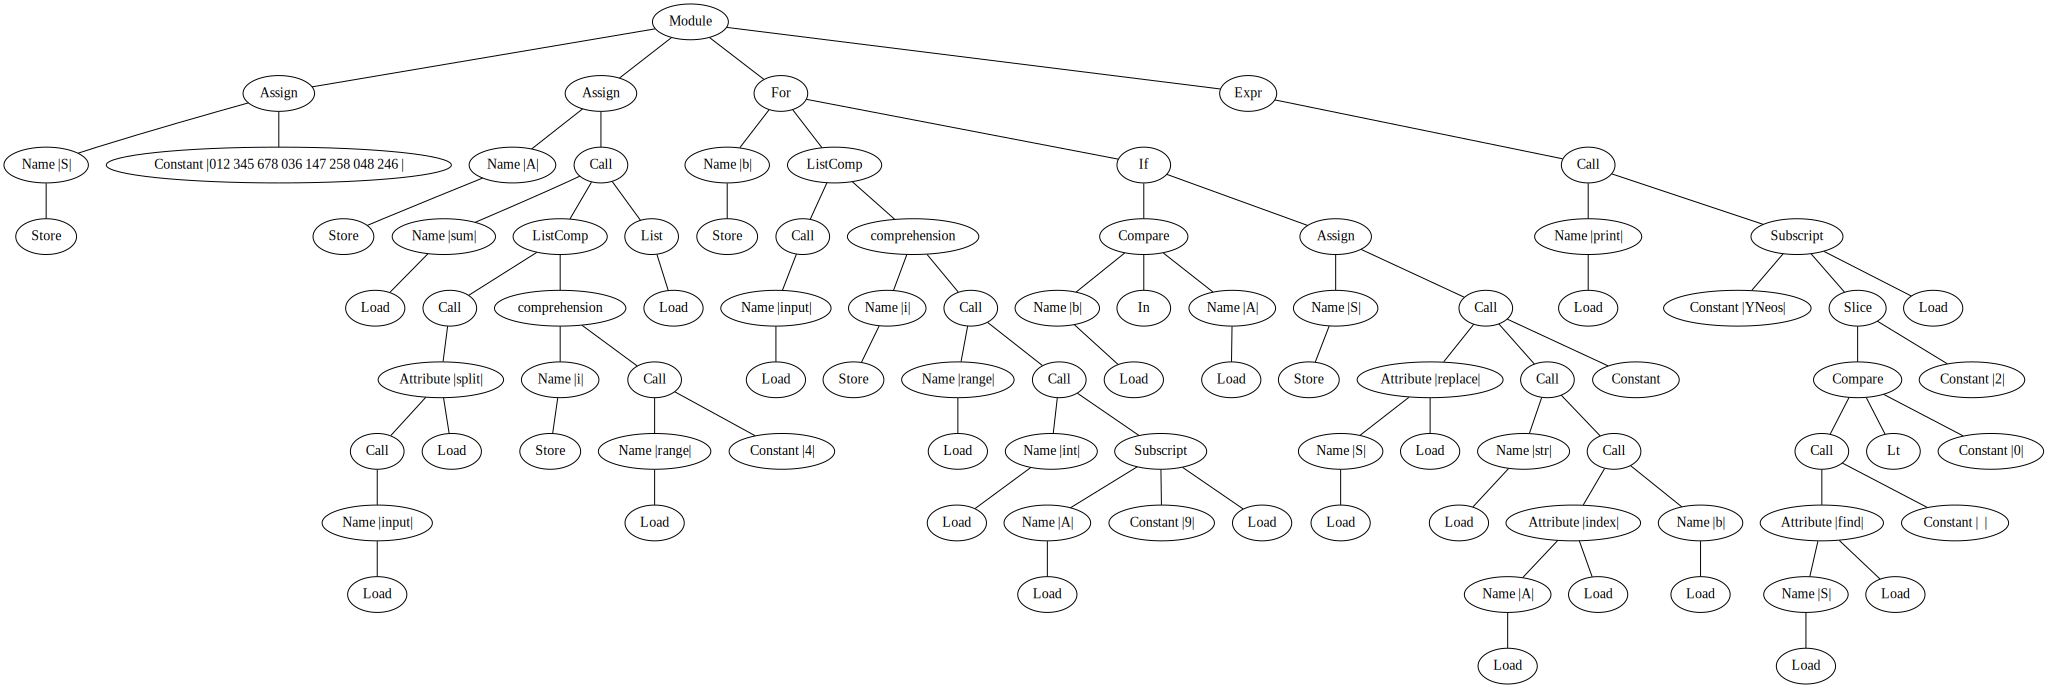

In [34]:
from visualization import AI4CodeGraphVizualizer
from AI4Code.AI4CodeJsonObject import AI4CodeJsonObject
import json
json_file = r"C:\Users\sebas\Documents\Masterarbeit\datasets\2_parallel_dataset\ai4code_py\p02760\s208026782.json"
with open(json_file, 'r') as json_file:
    ai4code_json = json.load(json_file)

ai4code = AI4CodeJsonObject.from_json(ai4code_json)
ast = ai4code.get_graph().get_root_node()
AI4CodeGraphVizualizer.visualize_ast(ast)

In [43]:
from dataset.AI4CodeProblemClassificationDataset import AI4CodeProblemClassificationDataset

dataset = AI4CodeProblemClassificationDataset(r"C:\Users\sebas\Documents\Masterarbeit\datasets\2_parallel_dataset\ai4code_problem_class_py", r"C:\Users\sebas\Documents\Masterarbeit\datasets\2_parallel_dataset\ai4code_py", 220, 53, 53)

In [44]:
dataset.create()

processing p02717 ...
... finished p02717
processing p02718 ...
... finished p02718
processing p02719 ...
... finished p02719
processing p02723 ...
... finished p02723
processing p02724 ...
... finished p02724
processing p02725 ...
... finished p02725
processing p02729 ...
... finished p02729
processing p02730 ...
... finished p02730
processing p02731 ...
... finished p02731
processing p02753 ...
... finished p02753
processing p02754 ...
... finished p02754
processing p02755 ...
... finished p02755
processing p02760 ...
... finished p02760
processing p02766 ...
... finished p02766
processing p02767 ...
... finished p02767
processing p02771 ...
... finished p02771
processing p02772 ...
... finished p02772
processing p02773 ...
... finished p02773
processing p02779 ...
... finished p02779
processing p02783 ...
... finished p02783
processing p02784 ...
... finished p02784
processing p02785 ...
... finished p02785
processing p02786 ...
... finished p02786
processing p02790 ...
... finished

In [45]:
dataset.get_vocabulary_map()

{'Add': 1,
 'And': 2,
 'Assert': 3,
 'Assign': 4,
 'Attribute': 5,
 'AugAssign': 6,
 'BinOp': 7,
 'BitAnd': 8,
 'BitOr': 9,
 'BitXor': 10,
 'BoolOp': 11,
 'Break': 12,
 'Call': 13,
 'ClassDef': 14,
 'Compare': 15,
 'Constant': 16,
 'Continue': 17,
 'Del': 18,
 'Delete': 19,
 'Dict': 20,
 'DictComp': 21,
 'Div': 22,
 'Eq': 23,
 'ExceptHandler': 24,
 'Expr': 25,
 'FloorDiv': 26,
 'For': 27,
 'FormattedValue': 28,
 'FunctionDef': 29,
 'GeneratorExp': 30,
 'Global': 31,
 'Gt': 32,
 'GtE': 33,
 'If': 34,
 'IfExp': 35,
 'Import': 36,
 'ImportFrom': 37,
 'In': 38,
 'Invert': 39,
 'Is': 40,
 'IsNot': 41,
 'JoinedStr': 42,
 'LShift': 43,
 'Lambda': 44,
 'List': 45,
 'ListComp': 46,
 'Load': 47,
 'Lt': 48,
 'LtE': 49,
 'Mod': 50,
 'Module': 51,
 'Mult': 52,
 'Name': 53,
 'Nonlocal': 54,
 'Not': 55,
 'NotEq': 56,
 'NotIn': 57,
 'Or': 58,
 'Pass': 59,
 'Pow': 60,
 'RShift': 61,
 'Raise': 62,
 'Return': 63,
 'Set': 64,
 'SetComp': 65,
 'Slice': 66,
 'Starred': 67,
 'Store': 68,
 'Sub': 69,
 'Subscr

In [46]:
from keras.metrics import Precision, Recall
import tensorflow as tf
from classifier.Tbcnn import Tbcnn
node_map = dataset.get_vocabulary_map()
labels = dataset.get_labels()
model = Tbcnn(feature_size=len(node_map), num_kernels=600, num_classes=len(labels))
model.compile(loss=tf.keras.losses.CategoricalCrossentropy(), optimizer='adam',
              metrics = [tf.keras.metrics.CategoricalAccuracy(), Precision(), Recall()])

In [47]:
from generators.FileStreamDataGenerator import FileStreamDataGenerator

train_files = dataset.get_train_files()
val_files = dataset.get_val_files()
training_generator = FileStreamDataGenerator(train_files, labels, node_map, batch_size=1, shuffle=True)
validation_generator = FileStreamDataGenerator(val_files, labels, node_map, batch_size=1, shuffle=False)
model.fit(training_generator, validation_data=validation_generator, epochs=1)

22880/22880 [==============================] - 201s 9ms/step - loss: 0.8758 - categorical_accuracy: 0.7897 - precision_2: 0.9228 - recall_2: 0.7086 - val_loss: 0.3929 - val_categorical_accuracy: 0.8959 - val_precision_2: 0.9321 - val_recall_2: 0.8743


In [48]:
test_files = dataset.get_test_files()
test_generator = FileStreamDataGenerator(test_files, labels, node_map, batch_size=1, shuffle=False)
y_hat = model.predict(test_generator)
metrics = model.evaluate(test_generator)

5512/5512 [==============================] - 35s 6ms/step - loss: 0.3749 - categorical_accuracy: 0.9026 - precision_2: 0.9370 - recall_2: 0.8790


In [49]:
from numpy import argmax
labels = list(test_generator.get_label_lookup().keys())
expected_labels = []
predicted_labels = []
for i in range(len(test_generator)):
    _, y = test_generator[i]
    expected_label = labels[argmax(y)]
    predicted_label = labels[argmax(y_hat[i])]
    expected_labels.append(expected_label)
    predicted_labels.append(predicted_label)

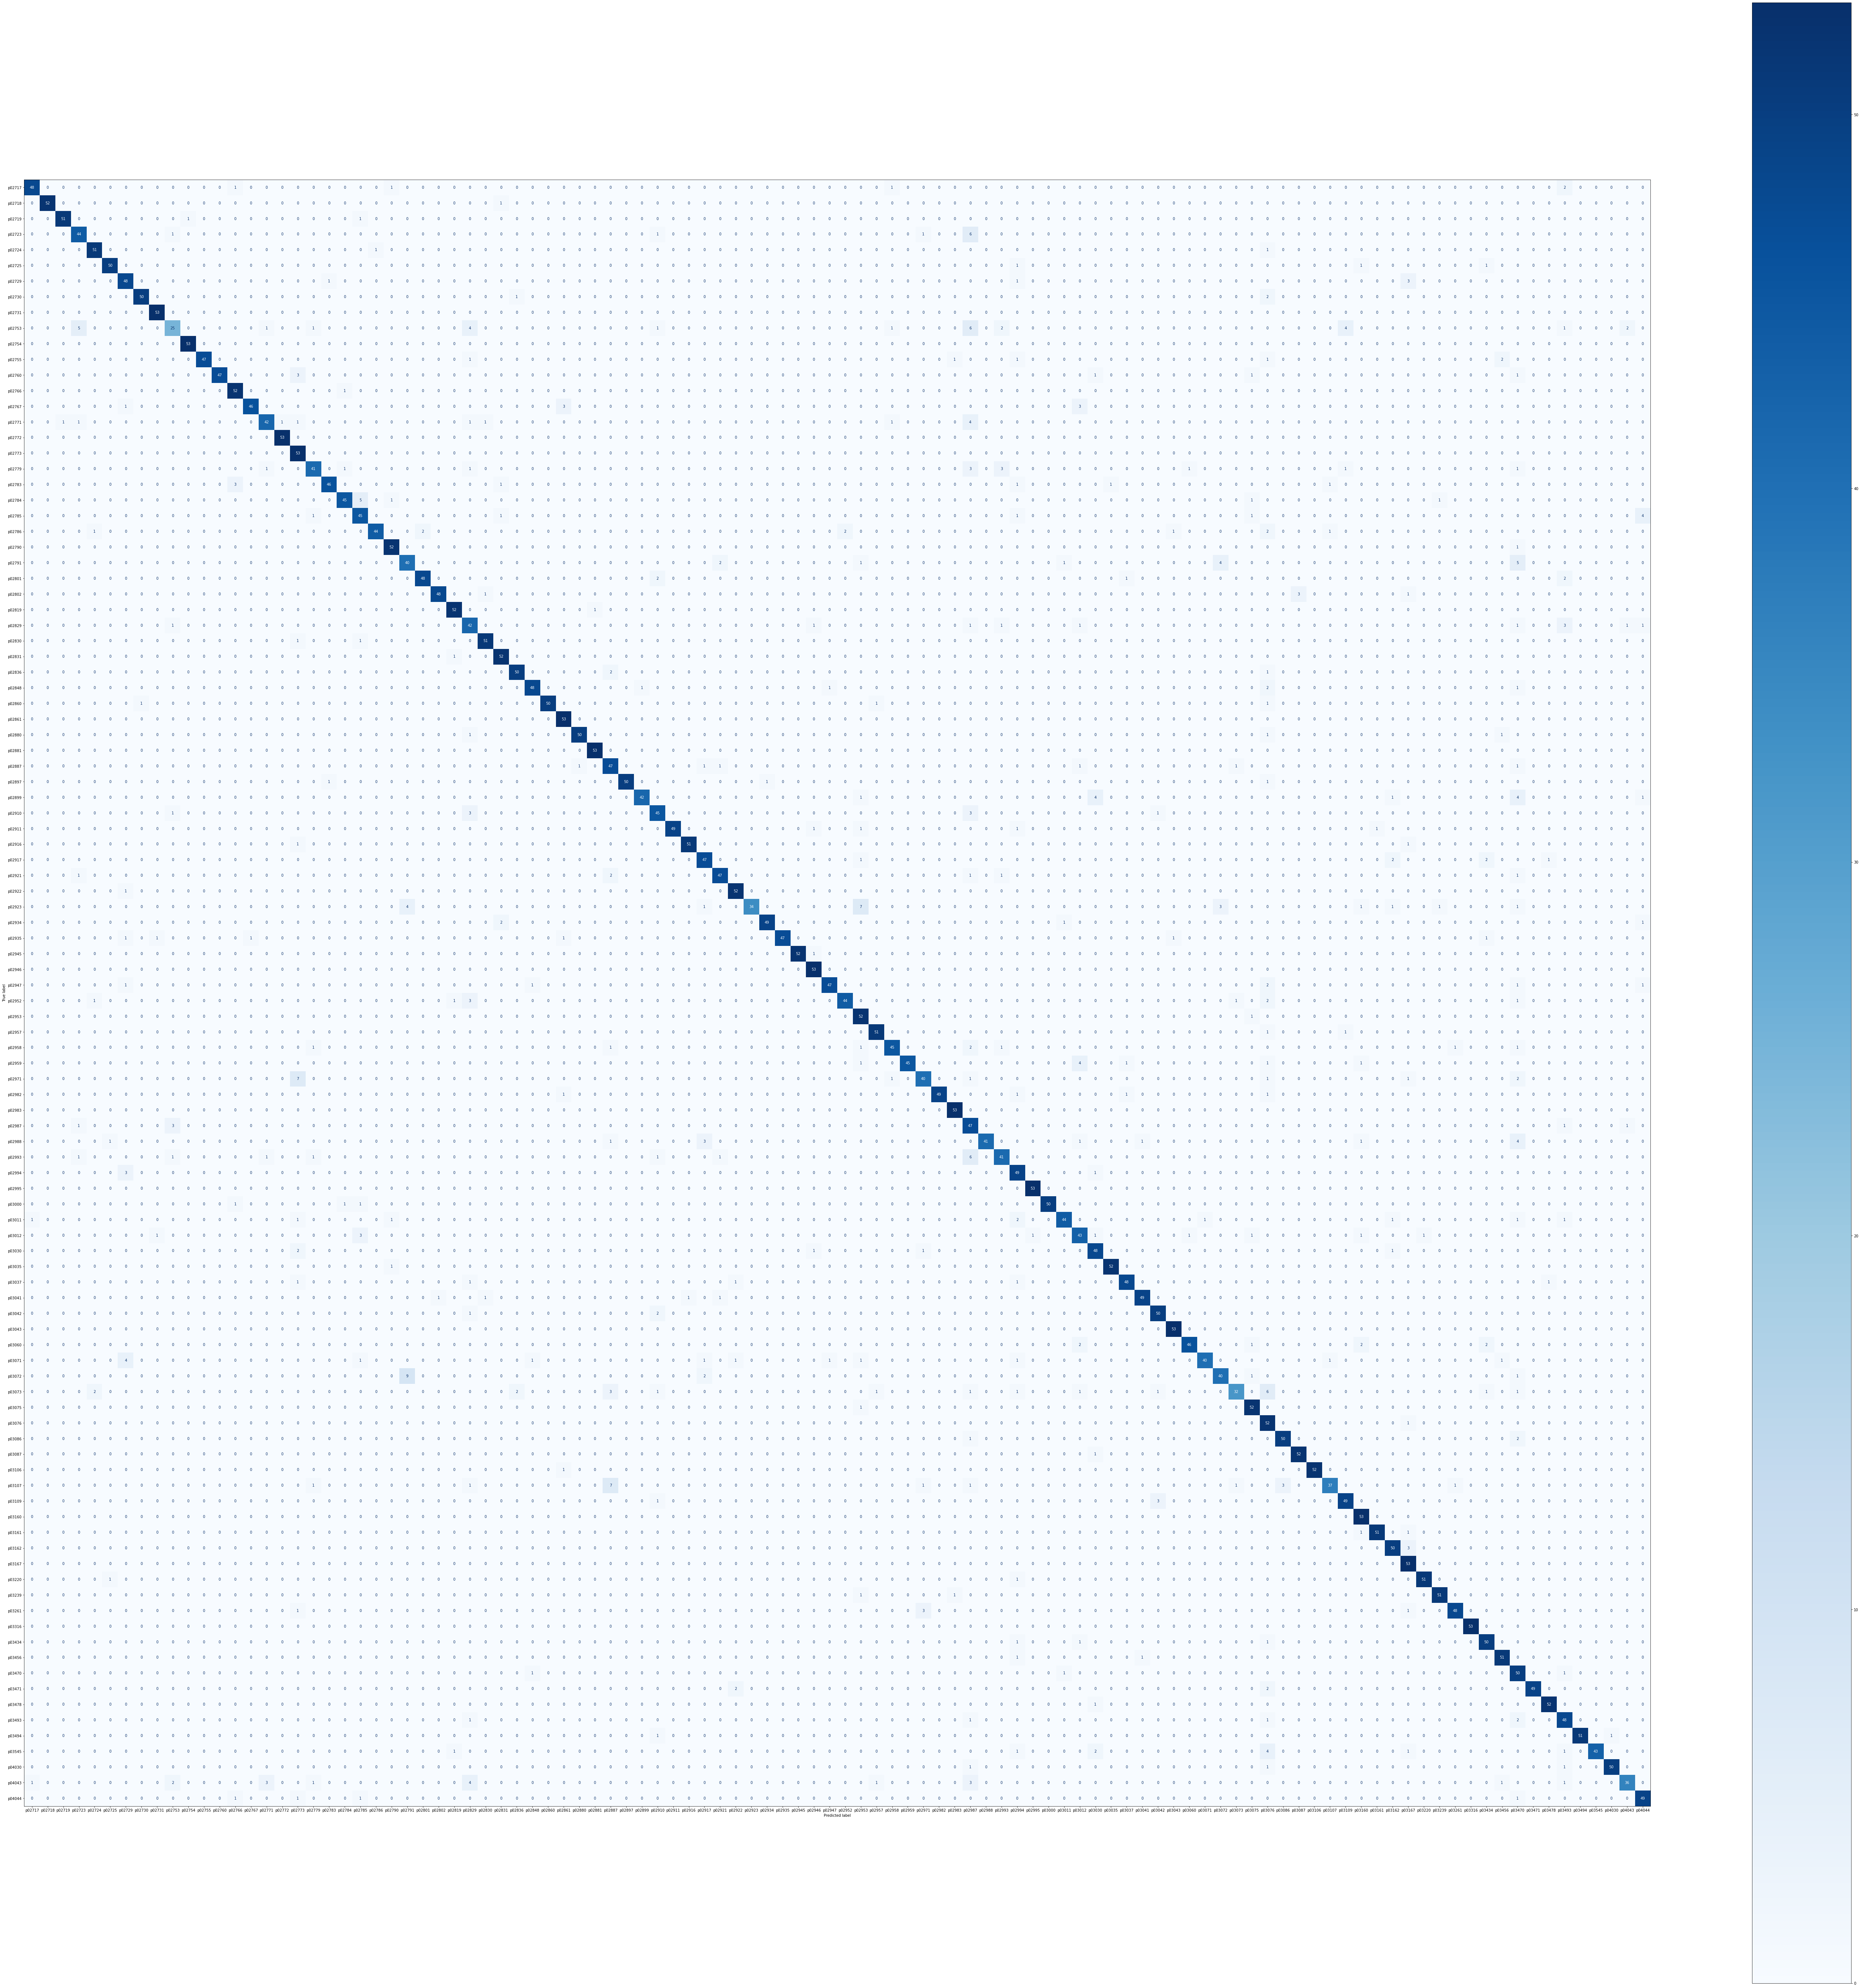

In [50]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from matplotlib import pyplot as plt
_, ax = plt.subplots(1, 1, figsize=(100, 100))
cm = confusion_matrix(expected_labels, predicted_labels, labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap=plt.cm.Blues, ax=ax)
plt.show()

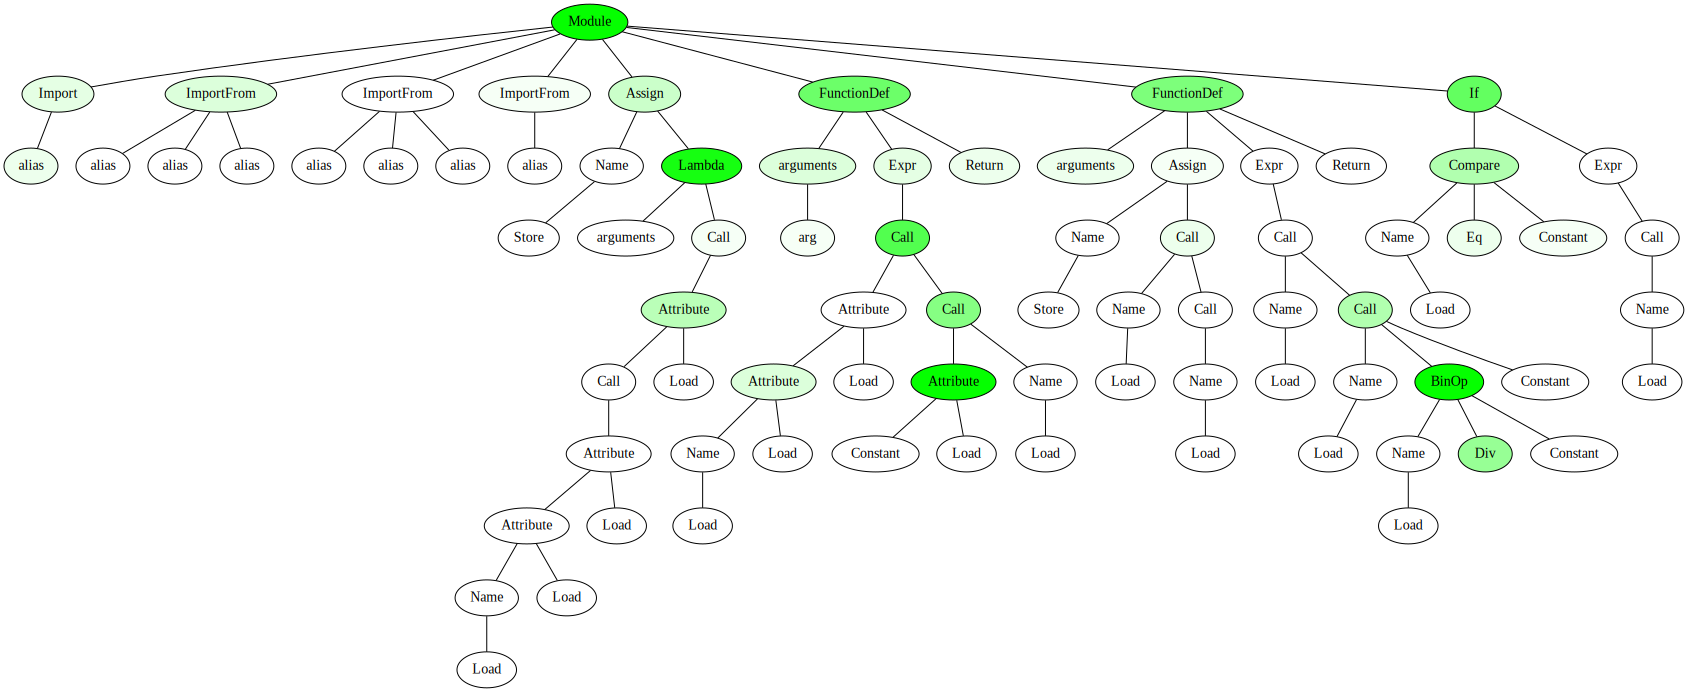

In [51]:
from collections import Counter
from visualization.GraphvizVisualizer import GraphvizVisualizer
sample_id = 1
nodes, children = test_generator.__getitem__(sample_id)[0]
conv_filter_activations = model.conv_layer([nodes, children])
node_importance = model.pooling_layer(conv_filter_activations)[0]
node_importance_list = node_importance.numpy().tolist()[0]
counter = Counter(node_importance_list)
import pickle
with open(test_files[sample_id], 'rb') as f:
    test_sample_ast = pickle.load(f)
vis = GraphvizVisualizer()
vis.visualizeAst(test_sample_ast, counter)

In [52]:
test_files[sample_id]

'C:\\Users\\sebas\\Documents\\Masterarbeit\\datasets\\2_parallel_dataset\\ai4code_problem_class_py\\test\\s000443382.pkl'

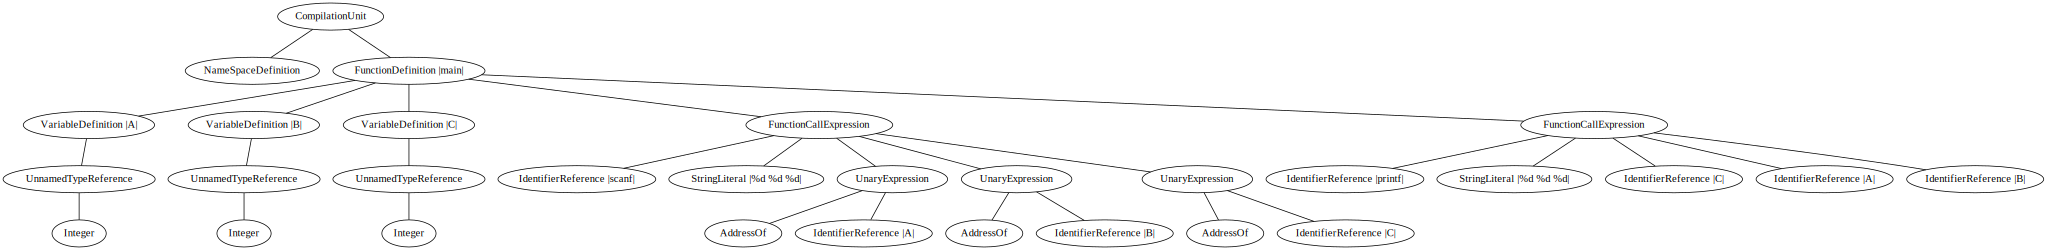

In [8]:
from visualization import AI4CodeGraphVizualizer
from AI4Code.AI4CodeJsonObject import AI4CodeJsonObject
import json
json_file = r"C:\Users\sebas\Documents\Masterarbeit\datasets\2_parallel_dataset\ai4code_astm_cpp\p02717\s914764764.cpp.json"
with open(json_file, 'r') as json_file:
    ai4code_json = json.load(json_file)

ai4code = AI4CodeJsonObject.from_json(ai4code_json)
ast = ai4code.get_graph().get_root_node()
AI4CodeGraphVizualizer.visualize_ast(ast)

In [1]:
from dataset.AI4CodeProblemClassificationDataset import AI4CodeProblemClassificationDataset

dataset = AI4CodeProblemClassificationDataset(r"C:\Users\sebas\Documents\Masterarbeit\datasets\2_parallel_dataset\ai4code_problem_class_astm_cpp", r"C:\Users\sebas\Documents\Masterarbeit\datasets\2_parallel_dataset\ai4code_astm_cpp", 200, 35, 35)

In [3]:
dataset.create()

processing p02717 ...
... finished p02717
processing p02718 ...
... finished p02718
processing p02719 ...
... finished p02719
processing p02723 ...
... finished p02723
processing p02724 ...
... finished p02724
processing p02725 ...
... finished p02725
processing p02729 ...
... finished p02729
processing p02730 ...
... finished p02730
processing p02731 ...
... finished p02731
processing p02753 ...
... finished p02753
processing p02754 ...
... finished p02754
processing p02755 ...
... finished p02755
processing p02760 ...
... finished p02760
processing p02766 ...
... finished p02766
processing p02767 ...
... finished p02767
processing p02771 ...
... finished p02771
processing p02772 ...
... finished p02772
processing p02773 ...
... finished p02773
processing p02779 ...
... finished p02779
processing p02783 ...
... finished p02783
processing p02784 ...
... finished p02784
processing p02785 ...
... finished p02785
processing p02786 ...
... finished p02786
processing p02790 ...
... finished

In [4]:
dataset.get_vocabulary_map()

{'ASTM_UNK': 1,
 'Add': 2,
 'AddressOf': 3,
 'AggregateExpression': 4,
 'And': 5,
 'ArrayAccess': 6,
 'ArrayType': 7,
 'Assign': 8,
 'BinaryExpression': 9,
 'BitAnd': 10,
 'BitLeftShift': 11,
 'BitNot': 12,
 'BitOr': 13,
 'BitRightShift': 14,
 'BitXor': 15,
 'BlockStatement': 16,
 'Boolean': 17,
 'BooleanLiteral': 18,
 'BreakStatement': 19,
 'CaseBlock': 20,
 'CastExpression': 21,
 'CatchBlock': 22,
 'CharLiteral': 23,
 'Character': 24,
 'ClassType': 25,
 'CollectionExpression': 26,
 'CompilationUnit': 27,
 'ConditionalExpression': 28,
 'ContinueStatement': 29,
 'Decrement': 30,
 'DefaultBlock': 31,
 'Deref': 32,
 'DerivesFrom': 33,
 'Dimension': 34,
 'Divide': 35,
 'DoWhileStatement': 36,
 'Double': 37,
 'EmptyStatement': 38,
 'EnumLiteralDefinition': 39,
 'EnumType': 40,
 'Equal': 41,
 'Exponent': 42,
 'ForCheckBeforeStatement': 43,
 'FormalParameterDeclaration': 44,
 'FormalParameterDefinition': 45,
 'FunctionCallExpression': 46,
 'FunctionDeclaration': 47,
 'FunctionDefinition': 48

In [5]:
from keras.metrics import Precision, Recall
import tensorflow as tf
from classifier.Tbcnn import Tbcnn
node_map = dataset.get_vocabulary_map()
labels = dataset.get_labels()
model = Tbcnn(feature_size=len(node_map), num_kernels=600, num_classes=len(labels))
model.compile(loss=tf.keras.losses.CategoricalCrossentropy(), optimizer='adam',
              metrics = [tf.keras.metrics.CategoricalAccuracy(), Precision(), Recall()])

In [6]:
from generators.FileStreamDataGenerator import FileStreamDataGenerator

train_files = dataset.get_train_files()
val_files = dataset.get_val_files()
training_generator = FileStreamDataGenerator(train_files, labels, node_map, batch_size=1, shuffle=True)
validation_generator = FileStreamDataGenerator(val_files, labels, node_map, batch_size=1, shuffle=False)
model.fit(training_generator, validation_data=validation_generator, epochs=1)

20800/20800 [==============================] - 187s 9ms/step - loss: 1.1154 - categorical_accuracy: 0.7412 - precision: 0.9238 - recall: 0.6379 - val_loss: 0.5286 - val_categorical_accuracy: 0.8690 - val_precision: 0.9184 - val_recall: 0.8346


In [9]:
test_files = dataset.get_test_files()
test_generator = FileStreamDataGenerator(test_files, labels, node_map, batch_size=1, shuffle=False)
y_hat = model.predict(test_generator)
metrics = model.evaluate(test_generator)

3640/3640 [==============================] - 22s 6ms/step - loss: 0.4953 - categorical_accuracy: 0.8648 - precision: 0.9178 - recall: 0.8313


In [10]:
from numpy import argmax
labels = list(test_generator.get_label_lookup().keys())
expected_labels = []
predicted_labels = []
for i in range(len(test_generator)):
    _, y = test_generator[i]
    expected_label = labels[argmax(y)]
    predicted_label = labels[argmax(y_hat[i])]
    expected_labels.append(expected_label)
    predicted_labels.append(predicted_label)

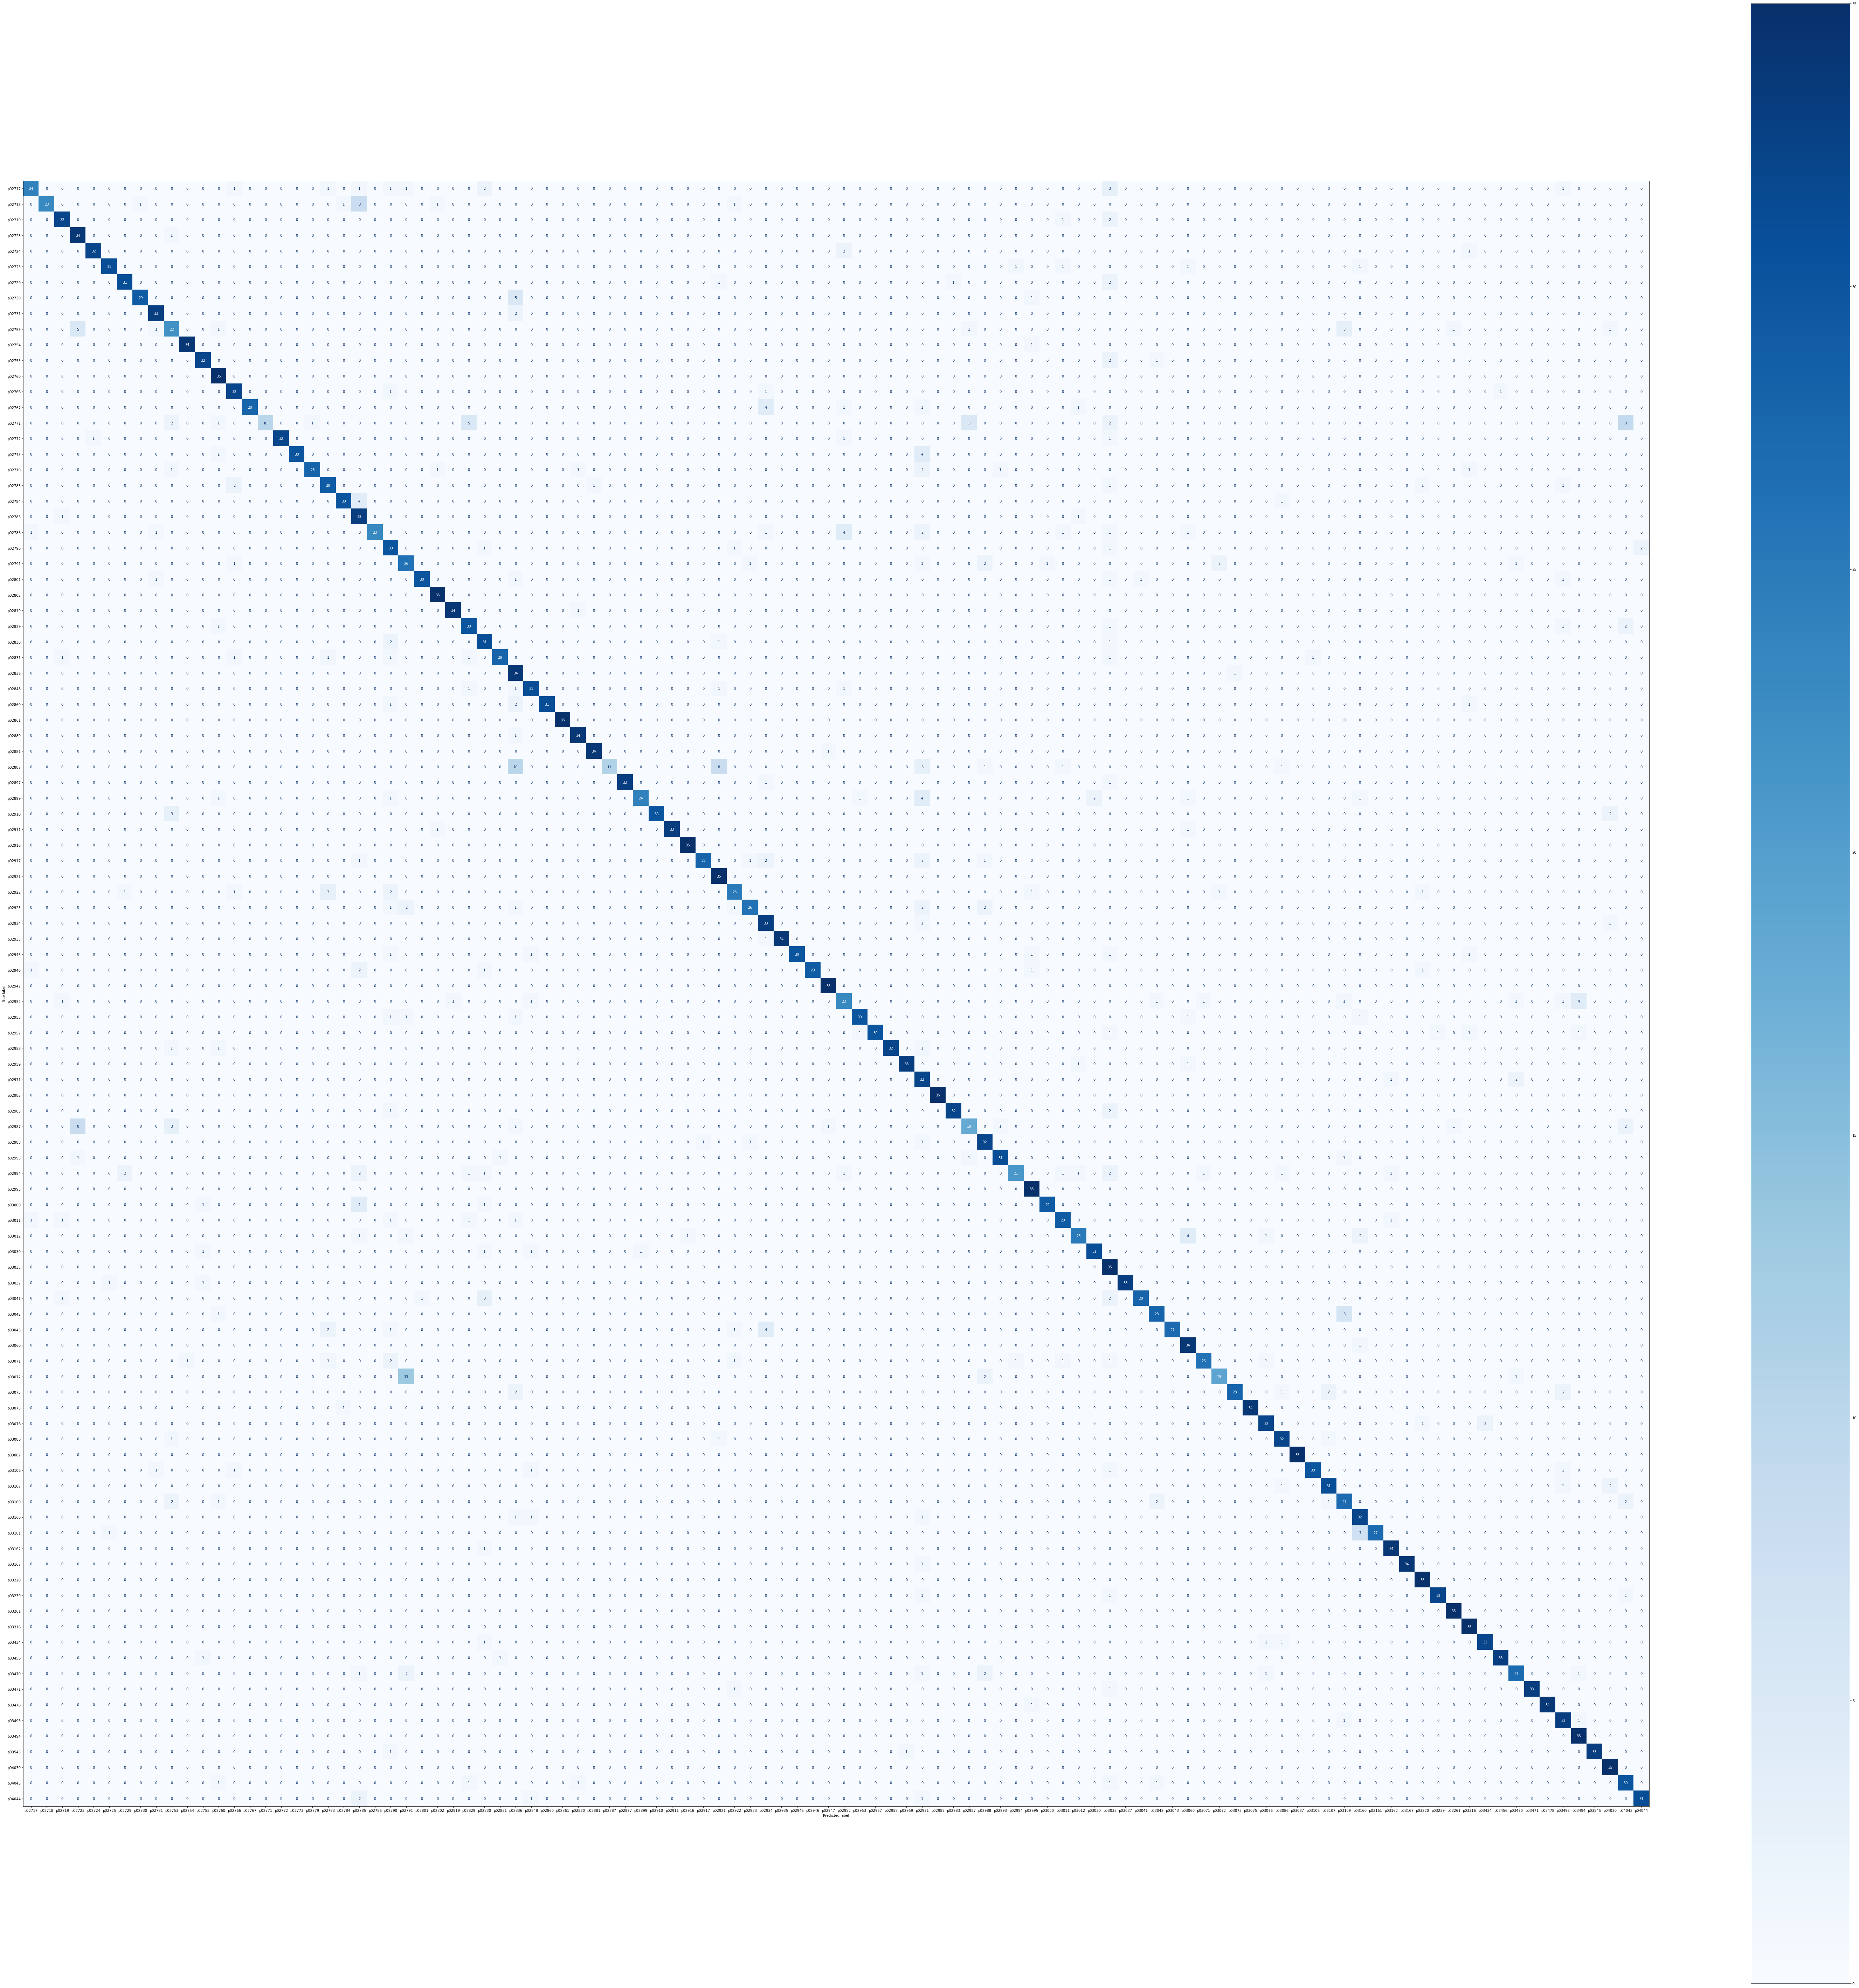

In [12]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from matplotlib import pyplot as plt
_, ax = plt.subplots(1, 1, figsize=(104, 104))
cm = confusion_matrix(expected_labels, predicted_labels, labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap=plt.cm.Blues, ax=ax)
plt.show()

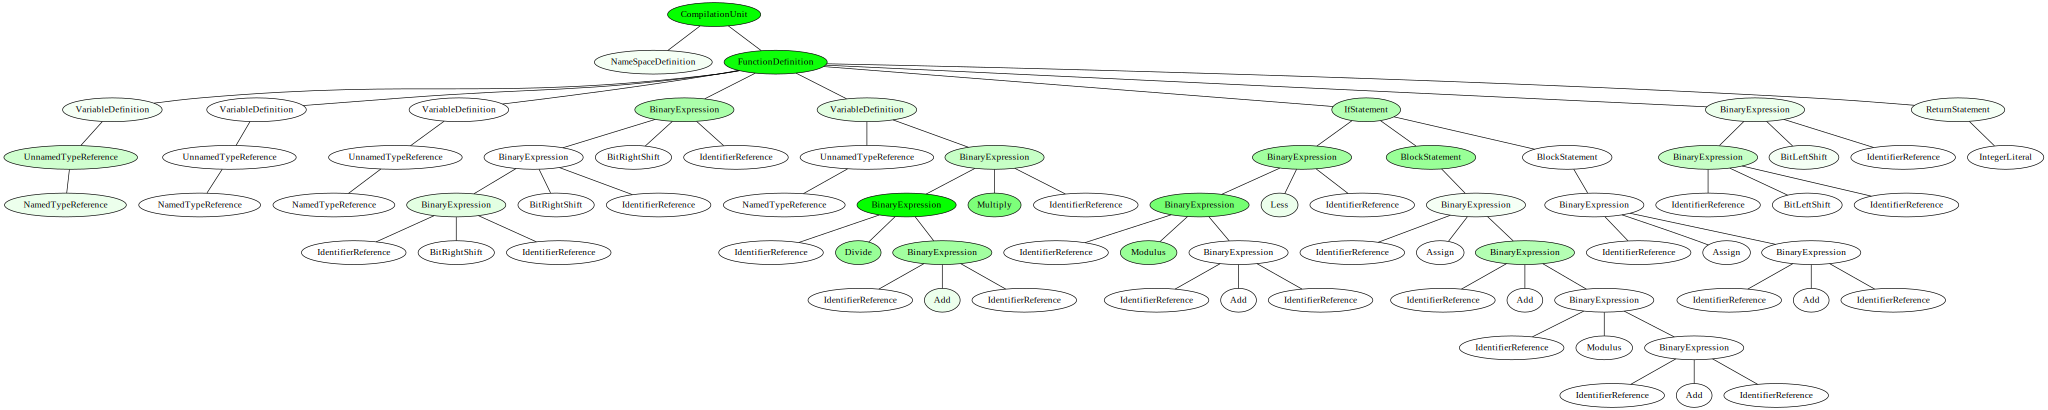

In [13]:
from collections import Counter
from visualization.GraphvizVisualizer import GraphvizVisualizer
sample_id = 1
nodes, children = test_generator.__getitem__(sample_id)[0]
conv_filter_activations = model.conv_layer([nodes, children])
node_importance = model.pooling_layer(conv_filter_activations)[0]
node_importance_list = node_importance.numpy().tolist()[0]
counter = Counter(node_importance_list)
import pickle
with open(test_files[sample_id], 'rb') as f:
    test_sample_ast = pickle.load(f)
vis = GraphvizVisualizer()
vis.visualizeAst(test_sample_ast, counter)

In [14]:
test_files[sample_id]

'C:\\Users\\sebas\\Documents\\Masterarbeit\\datasets\\2_parallel_dataset\\ai4code_problem_class_astm_cpp\\test\\s000311075.cpp.pkl'

In [15]:
from dataset.AI4CodeProblemClassificationDataset import AI4CodeProblemClassificationDataset

dataset = AI4CodeProblemClassificationDataset(r"C:\Users\sebas\Documents\Masterarbeit\datasets\2_parallel_dataset\ai4code_problem_class_astm_java", r"C:\Users\sebas\Documents\Masterarbeit\datasets\2_parallel_dataset\ai4code_astm_java", 213, 50, 50)

In [16]:
dataset.create()

processing p02717 ...
... finished p02717
processing p02718 ...
... finished p02718
processing p02719 ...
... finished p02719
processing p02723 ...
... finished p02723
processing p02724 ...
... finished p02724
processing p02725 ...
... finished p02725
processing p02729 ...
... finished p02729
processing p02730 ...
... finished p02730
processing p02731 ...
... finished p02731
processing p02753 ...
... finished p02753
processing p02754 ...
... finished p02754
processing p02755 ...
... finished p02755
processing p02760 ...
... finished p02760
processing p02766 ...
... finished p02766
processing p02767 ...
... finished p02767
processing p02771 ...
... finished p02771
processing p02772 ...
... finished p02772
processing p02773 ...
... finished p02773
processing p02779 ...
... finished p02779
processing p02783 ...
... finished p02783
processing p02784 ...
... finished p02784
processing p02785 ...
... finished p02785
processing p02786 ...
... finished p02786
processing p02790 ...
... finished

In [17]:
dataset.get_vocabulary_map()

{'ASTM_UNK': 1,
 'Add': 2,
 'AggregateExpression': 3,
 'And': 4,
 'ArrayAccess': 5,
 'ArrayType': 6,
 'Assign': 7,
 'BinaryExpression': 8,
 'BitAnd': 9,
 'BitLeftShift': 10,
 'BitNot': 11,
 'BitOr': 12,
 'BitRightShift': 13,
 'BitXor': 14,
 'BlockStatement': 15,
 'BooleanLiteral': 16,
 'BreakStatement': 17,
 'CaseBlock': 18,
 'CastExpression': 19,
 'CharLiteral': 20,
 'ClassType': 21,
 'CollectionExpression': 22,
 'CompilationUnit': 23,
 'ConditionalExpression': 24,
 'ContinueStatement': 25,
 'Decrement': 26,
 'DefaultBlock': 27,
 'DerivesFrom': 28,
 'Dimension': 29,
 'Divide': 30,
 'DoWhileStatement': 31,
 'EmptyStatement': 32,
 'EnumLiteralDefinition': 33,
 'EnumType': 34,
 'Equal': 35,
 'ExpressionFunctionReference': 36,
 'ForCheckBeforeStatement': 37,
 'FormalParameterDefinition': 38,
 'FunctionCallExpression': 39,
 'FunctionDefinition': 40,
 'Greater': 41,
 'IdentifierReference': 42,
 'IfStatement': 43,
 'Increment': 44,
 'IntegerLiteral': 45,
 'LabelDefinition': 46,
 'LabeledStat

In [18]:
from keras.metrics import Precision, Recall
import tensorflow as tf
from classifier.Tbcnn import Tbcnn
node_map = dataset.get_vocabulary_map()
labels = dataset.get_labels()
model = Tbcnn(feature_size=len(node_map), num_kernels=600, num_classes=len(labels))
model.compile(loss=tf.keras.losses.CategoricalCrossentropy(), optimizer='adam',
              metrics = [tf.keras.metrics.CategoricalAccuracy(), Precision(), Recall()])

In [19]:
from generators.FileStreamDataGenerator import FileStreamDataGenerator

train_files = dataset.get_train_files()
val_files = dataset.get_val_files()
training_generator = FileStreamDataGenerator(train_files, labels, node_map, batch_size=1, shuffle=True)
validation_generator = FileStreamDataGenerator(val_files, labels, node_map, batch_size=1, shuffle=False)
model.fit(training_generator, validation_data=validation_generator, epochs=1)

22152/22152 [==============================] - 212s 10ms/step - loss: 1.3586 - categorical_accuracy: 0.6877 - precision_1: 0.9050 - recall_1: 0.5618 - val_loss: 0.6978 - val_categorical_accuracy: 0.8256 - val_precision_1: 0.9065 - val_recall_1: 0.7683


In [20]:
test_files = dataset.get_test_files()
test_generator = FileStreamDataGenerator(test_files, labels, node_map, batch_size=1, shuffle=False)
y_hat = model.predict(test_generator)
metrics = model.evaluate(test_generator)

5200/5200 [==============================] - 37s 7ms/step - loss: 0.6942 - categorical_accuracy: 0.8315 - precision_1: 0.9131 - recall_1: 0.7762


In [21]:
from numpy import argmax
labels = list(test_generator.get_label_lookup().keys())
expected_labels = []
predicted_labels = []
for i in range(len(test_generator)):
    _, y = test_generator[i]
    expected_label = labels[argmax(y)]
    predicted_label = labels[argmax(y_hat[i])]
    expected_labels.append(expected_label)
    predicted_labels.append(predicted_label)

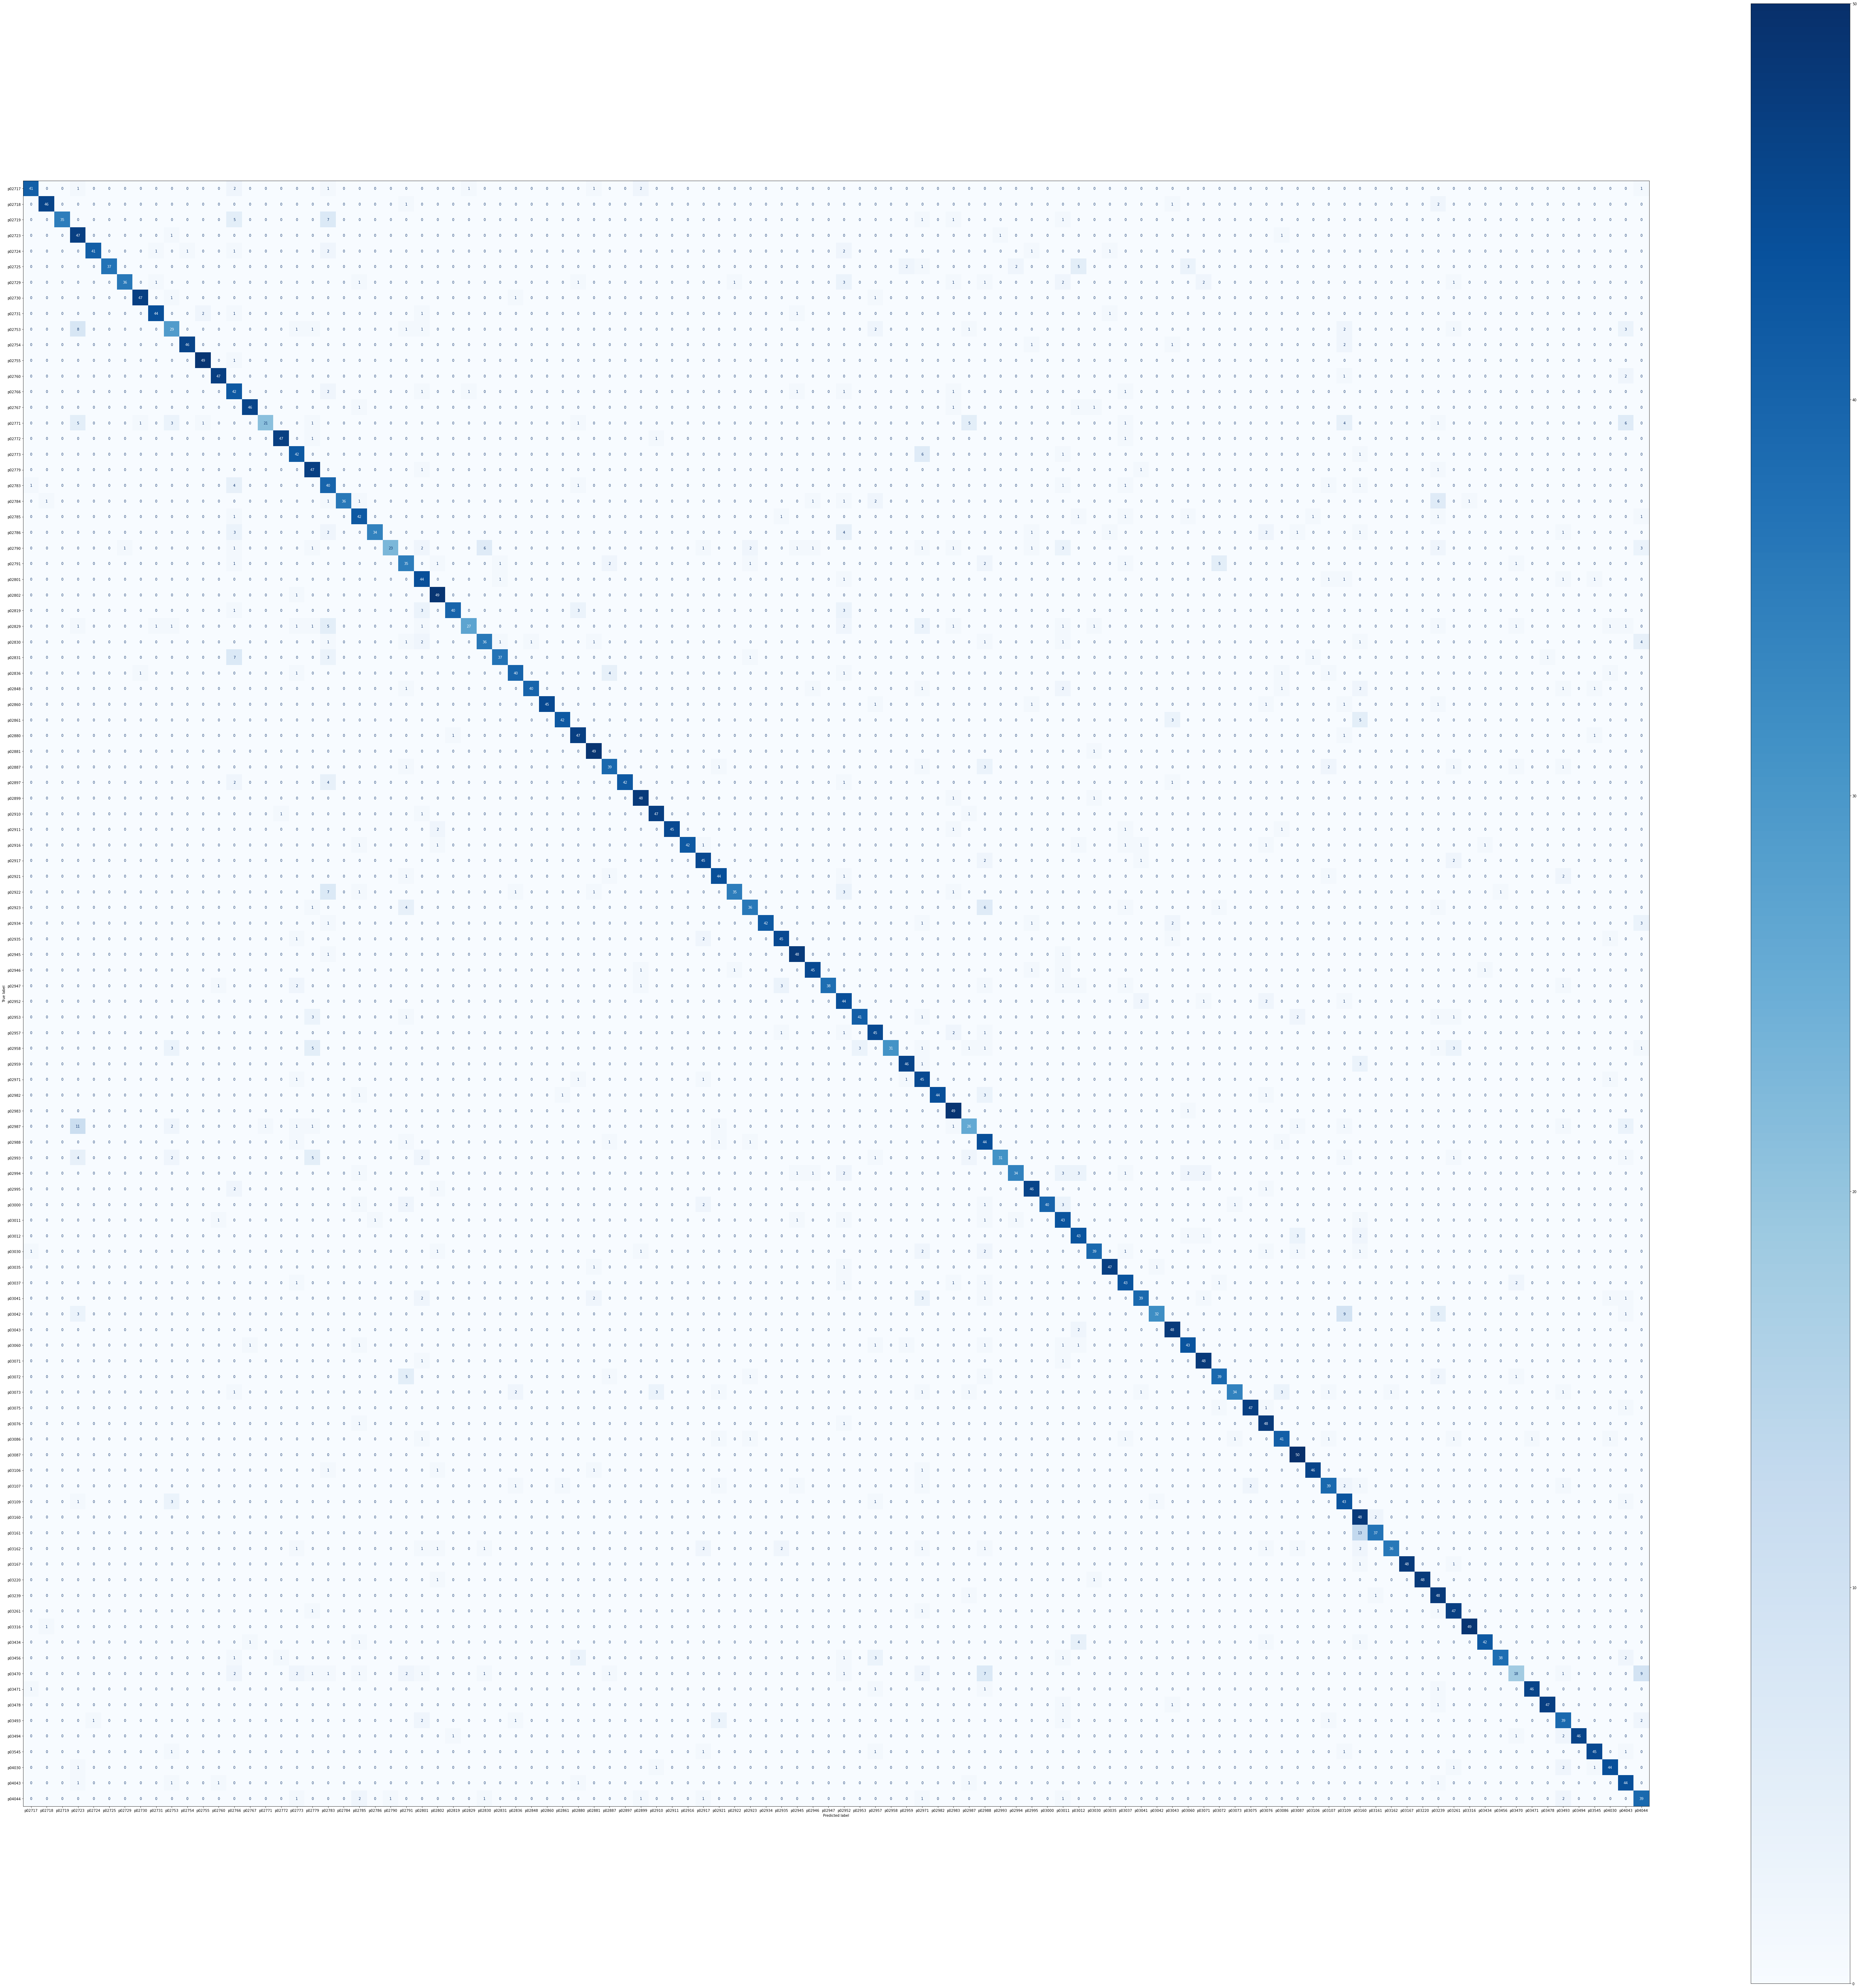

In [22]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from matplotlib import pyplot as plt
_, ax = plt.subplots(1, 1, figsize=(104, 104))
cm = confusion_matrix(expected_labels, predicted_labels, labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap=plt.cm.Blues, ax=ax)
plt.show()

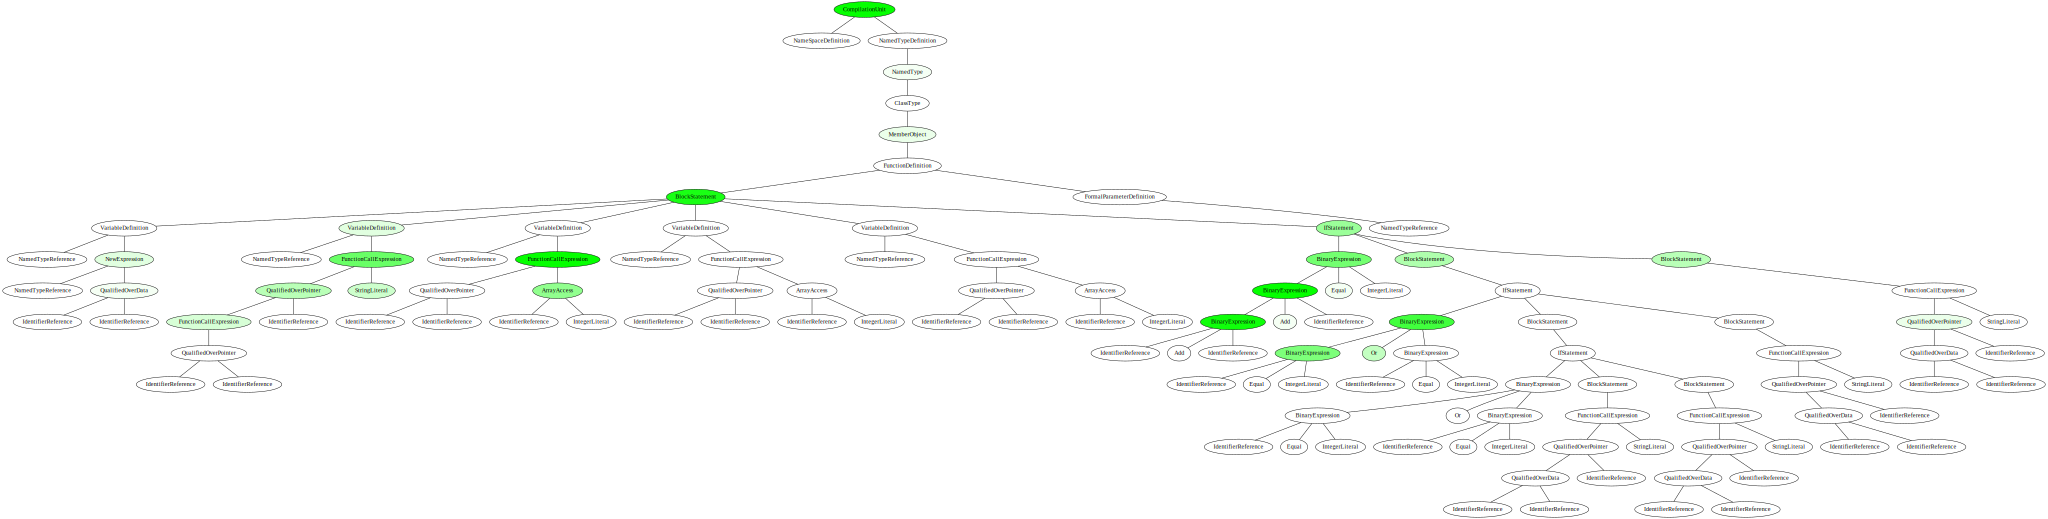

In [23]:
from collections import Counter
from visualization.GraphvizVisualizer import GraphvizVisualizer
sample_id = 1
nodes, children = test_generator.__getitem__(sample_id)[0]
conv_filter_activations = model.conv_layer([nodes, children])
node_importance = model.pooling_layer(conv_filter_activations)[0]
node_importance_list = node_importance.numpy().tolist()[0]
counter = Counter(node_importance_list)
import pickle
with open(test_files[sample_id], 'rb') as f:
    test_sample_ast = pickle.load(f)
vis = GraphvizVisualizer()
vis.visualizeAst(test_sample_ast, counter)

In [24]:
test_files[sample_id]

'C:\\Users\\sebas\\Documents\\Masterarbeit\\datasets\\2_parallel_dataset\\ai4code_problem_class_astm_java\\test\\s000321058.java.pkl'